# Load Function file

In [160]:
%run -i XAI.py


## Load the climate data

In [2]:
df_historical_climate = Load_df_AI('df_AI.csv')
df_historical_climate

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
DATE,,,
1960-09-04,20.850000,32.775000,4.3
1960-09-11,21.057143,31.900000,23.9
1960-09-18,15.542857,32.457143,0.0
1960-09-25,17.928571,33.485714,0.0
1960-10-02,14.442857,29.114286,0.0
...,...,...,...
2020-12-06,0.853782,15.403968,0.5
2020-12-13,4.185714,22.000000,2.8
2020-12-20,-0.014286,16.528571,14.2


## Give the path to save your files and load all data needed 

In [8]:
Results = create_folder_to_save('/untunded')

In [9]:
save_linreg = make_path_to_save(Results,'Linear_Regression')
save_linreg_rcp45 = make_path_to_save(save_linreg,'RCP_45')
save_linreg_rcp85 = make_path_to_save(save_linreg,'RCP_85')



In [10]:
save_XGBoost = make_path_to_save(Results,'XGBOOST')
save_features = make_path_to_save(save_XGBoost,'Features_importance')
save_xgb_45 = make_path_to_save(save_XGBoost,'RCP45')
save_xgb_85 = make_path_to_save(save_XGBoost,'RCP85')

In [3]:

df_historical_climate.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,3149.000000,3149.000000,3149.000000
mean,13.568321,26.482422,17.388114
std,7.639396,7.430151,30.479733
min,-8.800000,0.557143,0.000000
25%,7.057143,20.942857,0.000000
50%,14.159677,27.214286,5.100000
75%,20.900000,32.700000,23.100000
max,25.957143,40.414286,473.400000


In [161]:
basein = os.getcwd()
skip_rows = 30
base_dir  = basein
filename  = r"Daily_SpringDischarge_SanMarcos.csv"


## set the approved date(last day) for the analysis

Approved_date = '2020-10-11'

df_AI, Sf_data = Load_Springs(df_historical_climate,Approved_date,basein,skip_rows,base_dir,filename)
df_AI.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,3137.000000,3137.000000,3137.000000,3137.000000
mean,13.589060,26.494481,17.422477,4.998659
std,7.637568,7.436556,30.522492,1.873236
min,-8.800000,0.557143,0.000000,1.990286
25%,7.071429,20.942857,0.000000,3.551714
50%,14.200000,27.228571,5.100000,4.647857
75%,20.942857,32.714286,23.300000,6.047571
max,25.957143,40.414286,473.400000,12.759000


**Load the MACA 45**

In [15]:


#----------------------------------------
# RCP 4.5 - M4-Tmax; M10-Precip; M17-Tmin
#----------------------------------------

temp = MACA_data_SM(45,'M_18_Japan')

df_MACA_RCP45 = pd.DataFrame()
df_MACA_RCP45[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP45.index = pd.DatetimeIndex(df_MACA_RCP45['Date'])
df_MACA_RCP45.drop(['Date'],axis=1,inplace=True)



temp =MACA_data_SM(45,'M_18_Japan')
df_MACA_RCP45['$P$ [mm]'] = temp['Precip[mm]'].values


temp = MACA_data_SM(45,'M_4_USA')
df_MACA_RCP45['$T_{min}$ [$^oC$]'] = temp['Tmin[C]'].values


df_RCP45_MACA = pd.DataFrame()
df_RCP45_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP45['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP45_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP45['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP45_MACA['$P$ [mm]'] = df_MACA_RCP45['$P$ [mm]'].resample('W').sum().values
df_RCP45_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,15.311680,27.562172,18.328250
std,7.595859,7.689294,30.304124
min,-13.247194,1.649962,0.000000
25%,8.967193,21.722520,1.097293
50%,16.249530,28.119324,6.868001
75%,22.411885,33.920475,22.892587
max,27.602197,46.927602,400.595908


In [16]:
df_RCP45_MACA

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
Date,,,
2006-01-01,17.798395,14.742029,0.000000
2006-01-08,5.800339,19.514978,0.000000
2006-01-15,4.632401,21.245804,0.362527
2006-01-22,7.721948,24.924838,1.438277
2006-01-29,2.388374,25.622269,2.544369
...,...,...,...
2099-12-06,6.064111,18.046184,40.693705
2099-12-13,9.450189,17.211489,62.667066
2099-12-20,12.634899,18.786009,83.850139


**Load the RCP 8.5**

In [17]:

#----------------------------------------
# RCP 8.5- M4-Tmax; M10-Precip; M17-Tmin
#----------------------------------------

temp = MACA_data_SM(85,'M_18_Japan')

df_MACA_RCP85 = pd.DataFrame()
df_MACA_RCP85[['Date','$T_{max}$ [$^oC$]']] = temp[['Date','Tmax[C]']]
df_MACA_RCP85.index = pd.DatetimeIndex(df_MACA_RCP85['Date'])
df_MACA_RCP85.drop(['Date'],axis=1,inplace=True)



df_MACA_RCP85['$P$ [mm]']=MACA_data_SM(85,'M_18_Japan')['Precip[mm]'].values



df_MACA_RCP85['$T_{min}$ [$^oC$]']= MACA_data_SM(85,'M_4_USA')['Tmin[C]'].values


df_RCP85_MACA = pd.DataFrame()
df_RCP85_MACA['$T_{min}$ [$^oC$]'] = df_MACA_RCP85['$T_{min}$ [$^oC$]'].resample('W').mean()
df_RCP85_MACA['$T_{max}$ [$^oC$]'] = df_MACA_RCP85['$T_{max}$ [$^oC$]'].resample('W').mean().values
df_RCP85_MACA['$P$ [mm]'] = df_MACA_RCP85['$P$ [mm]'].resample('W').sum().values
df_RCP85_MACA.describe()

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
count,4906.000000,4906.000000,4906.000000
mean,16.317949,28.518329,17.723373
std,7.637849,8.005146,28.827272
min,-5.535311,-2.486796,0.000000
25%,9.987640,22.538566,0.969075
50%,17.270654,29.091135,6.643954
75%,23.415739,34.899279,21.658387
max,29.437982,46.867452,341.637357


# Feature Engineering

In [18]:
# Pumping patterns is hypothesized to be associated with the month
df_AI['Month'] = df_AI.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

df_AI['$P^{lag1}$ [mm]'] = df_AI['$P$ [mm]'].shift(1)
df_AI['$P^{lag2}$ [mm]'] = df_AI['$P$ [mm]'].shift(2)

df_AI['SF$^{lag1} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(1)
df_AI['SF$^{lag2} [m^3/s]$'] = df_AI['SF$[m^3/s]$'].shift(2)

df_AI.dropna(inplace=True)
df_AI

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,Month,$T_{max}^{lag1}$ [$^oC$],$T_{max}^{lag2}$ [$^oC$],$T_{min}^{lag1}$ [$^oC$],$T_{min}^{lag2}$ [$^oC$],$P^{lag1}$ [mm],$P^{lag2}$ [mm],SF$^{lag1} [m^3/s]$,SF$^{lag2} [m^3/s]$
DATE,,,,,,,,,,,,,
1960-09-18,15.542857,32.457143,0.0,5.711571,9,31.900000,32.775000,21.057143,20.850000,23.9,4.3,5.934429,6.145000
1960-09-25,17.928571,33.485714,0.0,5.541571,9,32.457143,31.900000,15.542857,21.057143,0.0,23.9,5.711571,5.934429
1960-10-02,14.442857,29.114286,0.0,5.372143,10,33.485714,32.457143,17.928571,15.542857,0.0,0.0,5.541571,5.711571
1960-10-09,16.342857,32.200000,2.1,5.270857,10,29.114286,33.485714,14.442857,17.928571,0.0,0.0,5.372143,5.541571
1960-10-16,17.785714,31.600000,82.3,5.210000,10,32.200000,29.114286,16.342857,14.442857,2.1,0.0,5.270857,5.372143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13,17.714286,30.228571,95.0,3.822714,9,33.328571,37.371429,23.642857,24.214286,59.2,0.0,3.746000,3.774286
2020-09-20,19.928571,30.571429,2.8,3.891571,9,30.228571,33.328571,17.714286,23.642857,95.0,59.2,3.822714,3.746000
2020-09-27,16.971429,26.914286,11.2,3.899571,9,30.571429,30.228571,19.928571,17.714286,2.8,95.0,3.891571,3.822714


In [19]:
df_AI.to_excel(Results+"/df_AI_San_Marcos_Springs.xlsx")

In [20]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']

#Create Independent and dependent variable for machine learning
X = df_AI[Features].to_numpy()
Y = df_AI[Target].to_numpy()

#Take the tain set till 2005 and test set from 2006 till 2020
df_AI_Train = df_AI[:'2005-12-31']

df_AI_Test = df_AI['2006-01-01':]



train_X = df_AI_Train[Features].to_numpy()
train_y = df_AI_Train[Target].to_numpy()
test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)


# Linear regresion 

In [ ]:
save_linreg = make_path_to_save(Results,'Linear_Regression')
save_linreg_rcp45 = make_path_to_save(save_linreg,'RCP_45')
save_linreg_rcp85 = make_path_to_save(save_linreg,'RCP_85')



In [21]:
lin_reg = LinearRegression(normalize=True).fit(train_X, train_y)


coef_dict = {}
for coef, feat in zip(lin_reg.coef_[0,:],Features):
    coef_dict[feat] = coef
coef_dict
with open('dict.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in coef_dict.items():
       writer.writerow([key, value])
print(lin_reg.intercept_)

[0.08149266]


In [23]:
linreg_Train,lin_reg_Test,lin_reg_Y_Train_Pred = Data_training(LinearRegression(), save_linreg)

Time taken to train the model: 0.00 minutes
############ Model Accuracy Xgboost -Train ############
RMSE: 0.241 m/s3
MAE: 0.135 m/s^3
MBE: 0.000 m/s3
R-squared: 0.983
########################################
 
############ Model Accuracy XGBoost -Test ############
RMSE: 0.868 m
MAE: 0.598 m
MBE: 0.598 m
R-squared: 0.800
########################################
 


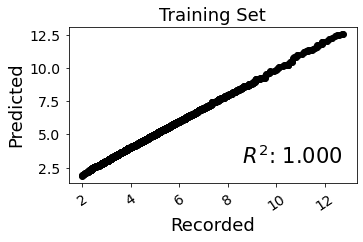

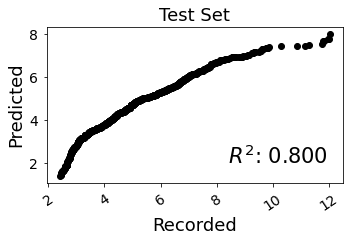

In [24]:
plot_training_test(linreg_Train,lin_reg_Test,lin_reg_Y_Train_Pred,save_linreg)

## RCP 4.5

############ Model Validation set Accuracy RCP 4.5###########
RMSE: 0.813 m/s^3
MAE: 0.542 m/s^3
MBE: 0.320 m/s^3
R-squared: 0.825
########################################
 


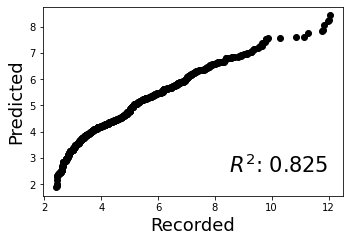

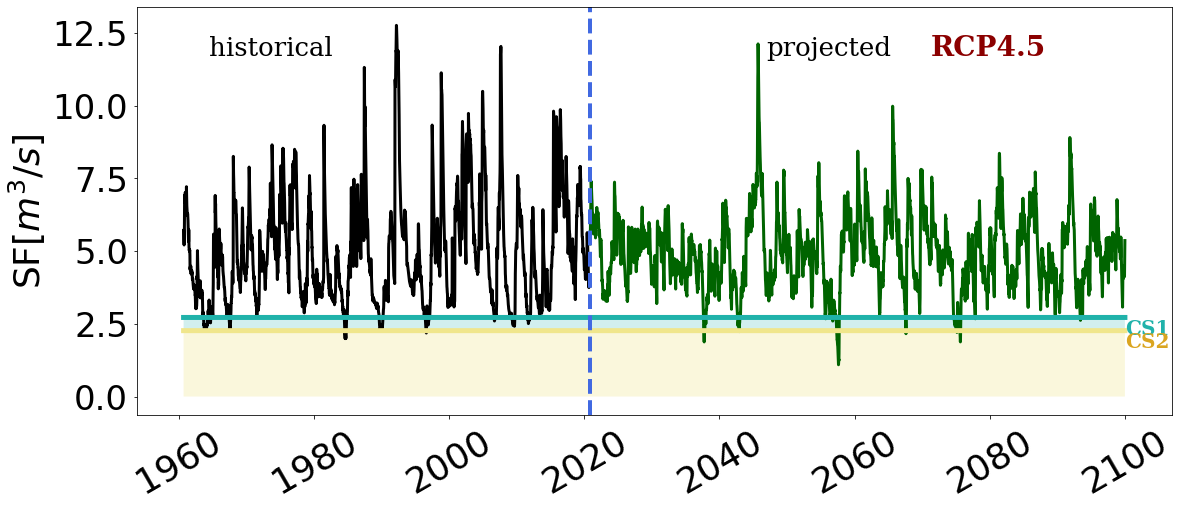

In [93]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)

df_future_45= RCP(df_RCP45_MACA,df_AI,lin_reg, 4.5, save_linreg_rcp45)



In [97]:
df_future_45.describe()

,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000
mean,6.524266,15.313544,27.567910,18.335406,4.897563
std,3.448260,7.595510,7.685567,30.308227,1.266209
min,1.000000,-13.247194,1.649962,0.000000,1.093109
25%,4.000000,8.968521,21.725107,1.098102,4.034842
50%,7.000000,16.249530,28.126132,6.872049,4.832786
75%,10.000000,22.413449,33.924775,22.897660,5.684745
max,12.000000,27.602197,46.927602,400.595908,12.121433


## RCP 8.5

############ Model Validation set Accuracy RCP 8.5###########
RMSE: 0.695 m/s^3
MAE: 0.505 m/s^3
MBE: 0.052 m/s^3
R-squared: 0.872
########################################
 


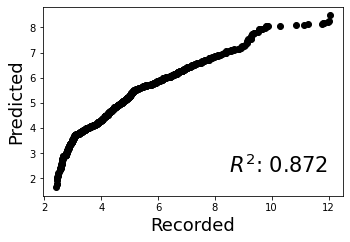

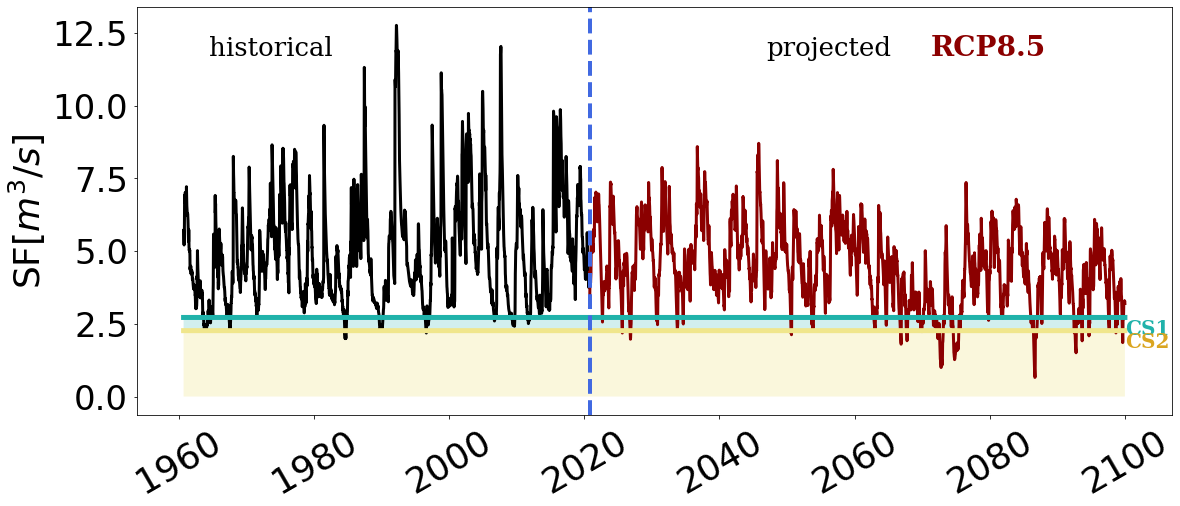

In [95]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)

df_future_85= RCP(df_RCP85_MACA,df_AI,lin_reg, 8.5, save_linreg_rcp85)



In [96]:
df_future_85.describe()

,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000
mean,6.524266,16.319701,28.523130,17.723635,4.548186
std,3.448260,7.638698,8.002986,28.831083,1.341020
min,1.000000,-5.535311,-2.486796,0.000000,0.657800
25%,4.000000,9.993536,22.550075,0.969577,3.635539
50%,7.000000,17.278101,29.094986,6.643954,4.494154
75%,10.000000,23.418151,34.902167,21.655931,5.522748
max,12.000000,29.437982,46.867452,341.637357,8.704166


In [194]:
df_future_45.to_excel(save_linreg_rcp45+str('/df_future_RCP45.xlsx'))

df_future_85.to_excel(save_linreg_rcp85+str('/df_future_RCP85.xlsx'))

# Essemble tree methods

Create a pipeline of models

In [101]:

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipelines = [pipeline_RF,pipeline_XGB,pipeline_ExTree]


In [105]:
[pipe.fit(train_X, train_y.ravel()) for pipe in pipelines]

[Pipeline(steps=[('RandomForest', RandomForestRegressor())]),
 Pipeline(steps=[('XGBoost',
                  XGBRegressor(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))]),
 Pipeline(steps=[('ExtraTree', ExtraTreesRegressor())])]

# Results for essemble methods


pipeline[1] from the above is xgboost!!! and that was choosen

Time taken to train the model: 0.00 minutes
############ Model Accuracy Xgboost -Train ############
RMSE: 0.040 m
MAE: 2.003 m
MBE: 0.000 m
R-squared: 1.000
########################################
 
############ Model Accuracy XGBoost -Test ############
RMSE: 0.720 m/s^3
MAE: 0.479 m/s^3
MBE: 0.215 m/s^3
R-squared: 0.863
########################################
 


(<Figure size 360x252 with 1 Axes>, <Figure size 360x252 with 1 Axes>)

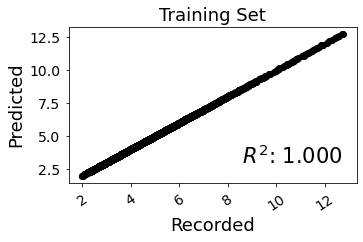

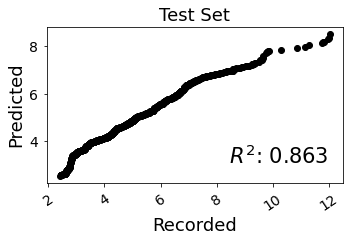

In [114]:
import sys
# SpringFlow Model - 
t0 = time()
np.random.seed(25)


xgb_model_SF = pipelines[1]
t1 = time()
#make the time to be in minutes
Time_Taken = (t1-t0)/60
print("Time taken to train the model: %0.2f" % Time_Taken,"minutes")


Y_Train_Pred = xgb_model_SF.predict(train_X)

rmse = np.sqrt(mean_squared_error(train_y,Y_Train_Pred))
RSQ = r2_score(train_y,Y_Train_Pred)
MAE = np.mean(np.abs(train_y - Y_Train_Pred))
MBE = np.mean(train_y - Y_Train_Pred)
print("############ Model Accuracy Xgboost -Train ############")
print("RMSE: %0.3f" % rmse,'m/s3')
print("MAE: %0.3f" % MAE,'m/s3')
print("MBE: %0.3f" % MBE,'m/s3')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


#################################################################################################
# Make predictions on Testing data and Test model accuracy
#################################################################################################
df_AI_Test['SF$^{pred} [m^3/s]$'] = 0
Test_X = df_AI_Test[Features].iloc[0].to_numpy().reshape(1, -1)
df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[0] = xgb_model_SF.predict(Test_X)[0]

i = 0
for row in df_AI_Test.itertuples():
    df_AI_Test['SF$^{lag1} [m^3/s]$'][i+1] = df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[i]
    
    df_AI_Test['SF$^{lag2} [m^3/s]$'][i+1] = df_AI_Test['SF$^{lag1} [m^3/s]$'].iloc[i]
    
    Test_X = df_AI_Test[Features].iloc[i+1].to_numpy().reshape(1, -1)
    df_AI_Test['SF$^{pred} [m^3/s]$'].iloc[i+1] = xgb_model_SF.predict(Test_X)[0]
    i = i+1
    if i == (len(df_AI_Test)-1):
        break

rmse = np.sqrt(mean_squared_error(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
                                  df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
RSQ = r2_score(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
               df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
MAE = np.mean(np.abs(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
                     df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
MBE = np.mean(df_AI_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
              df_AI_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
print("############ Model Accuracy XGBoost -Test ############")
print("RMSE: %0.3f" % rmse,'m/s^3')
print("MAE: %0.3f" % MAE,'m/s^3')
print("MBE: %0.3f" % MBE,'m/s^3')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")

results_from(save_XGBoost, Y_Train_Pred)

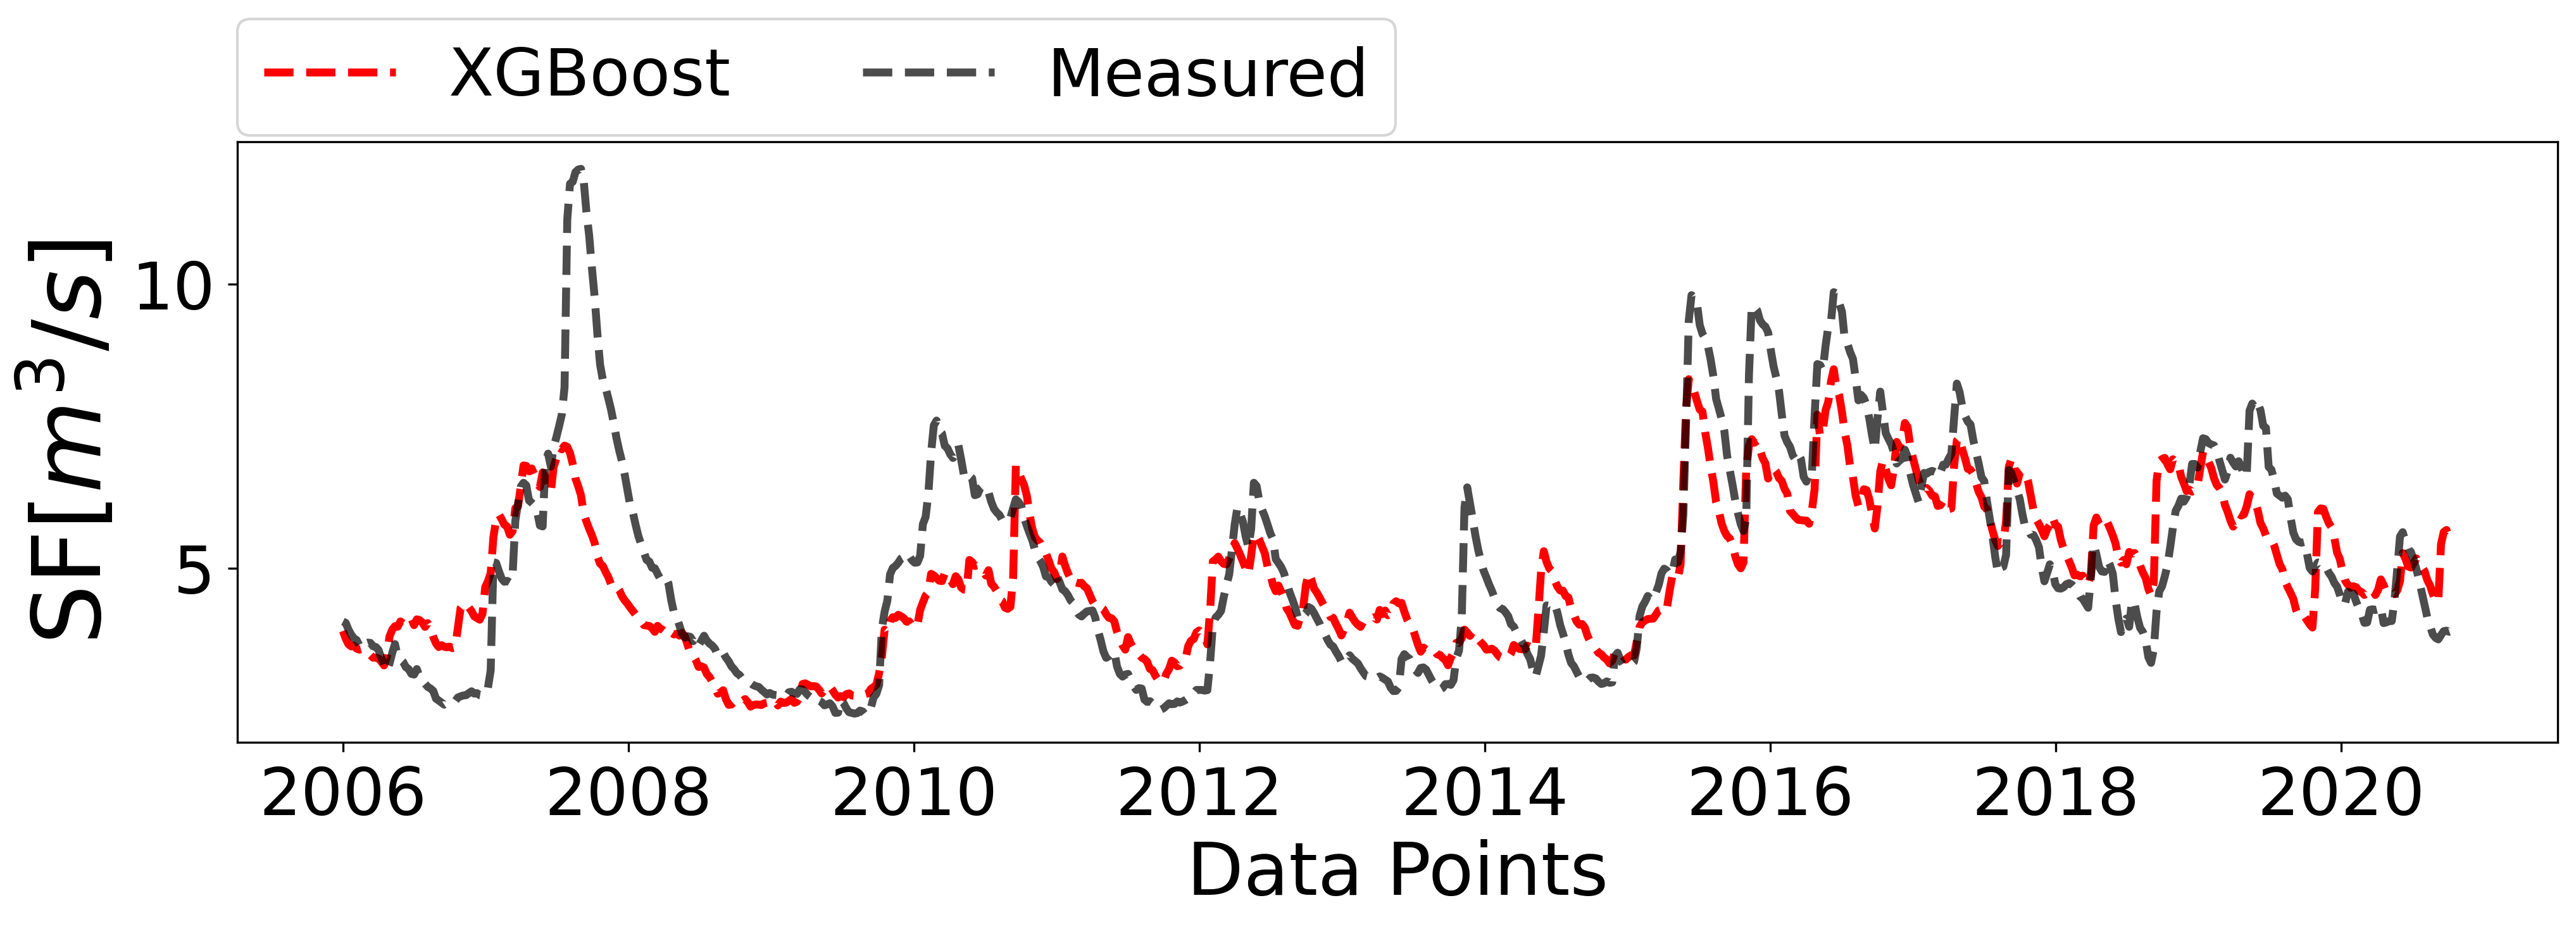

In [115]:
fig = plt.figure(figsize=(14,5),dpi=300)
ax = fig.add_subplot(1,1,1)

ax.plot(df_AI_Test['SF$[m^3/s]$'].index, df_AI_Test['SF$^{pred} [m^3/s]$'] , '--', color = 'red', lw = 3, label = 'XGBoost')
ax.plot(df_AI_Test['SF$[m^3/s]$'].index,  df_AI_Test['SF$[m^3/s]$'],'--', color = 'black', lw = 3, alpha=0.7, label = 'Measured')

ax.set_xlabel('Data Points', fontsize = 28)
ax.tick_params(axis = "x", labelsize = 25)
ax.xaxis.set_tick_params(pad=5)
ax.set_ylabel('SF$[m^3/s]$', fontsize = 36)

ax.tick_params(axis = "y", labelsize = 25)
ax.yaxis.set_tick_params(pad=5) # gap between ticks and axis
yoffset = 0.05                    #gap between ticks and label
################################################ 
plt.legend(bbox_to_anchor=(0,1.01), loc="lower left", ncol=3, borderaxespad=0., prop={'size': 25})

plt.tight_layout(pad=1.08)
fig.savefig(save_XGBoost + str('/Prelim_Data_Analysis__Complete.jpg'), format='jpg', dpi=300, bbox_inches = 'tight')

# Shapley Analysis 

In [124]:
xgb_model_SF =   XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, 
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None)

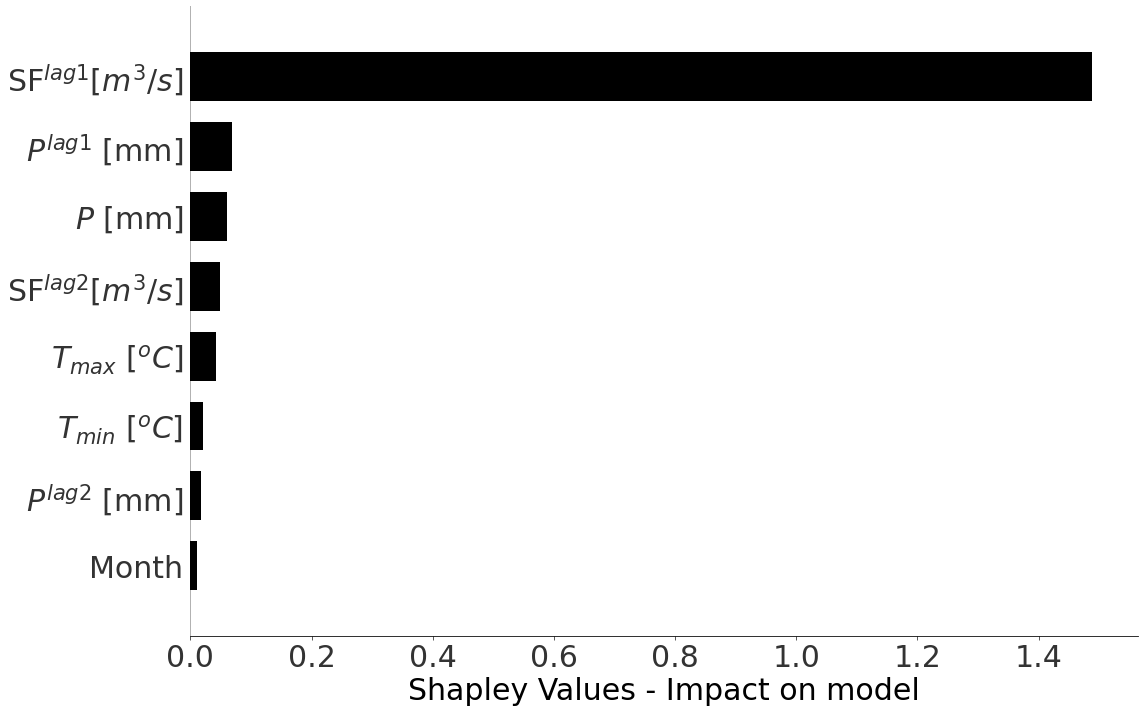

In [126]:
#################################################################################################
# Update Model SpringFLow Model
#################################################################################################20
#With the whole data from 1946 -2020
xgb_model_SF = xgb_model_SF.fit(X, Y)

explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), Features, plot_size=(16,10), show=False, 
                  plot_type = "bar", color = "black")
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(save_features + str('/Feature Importances- Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')


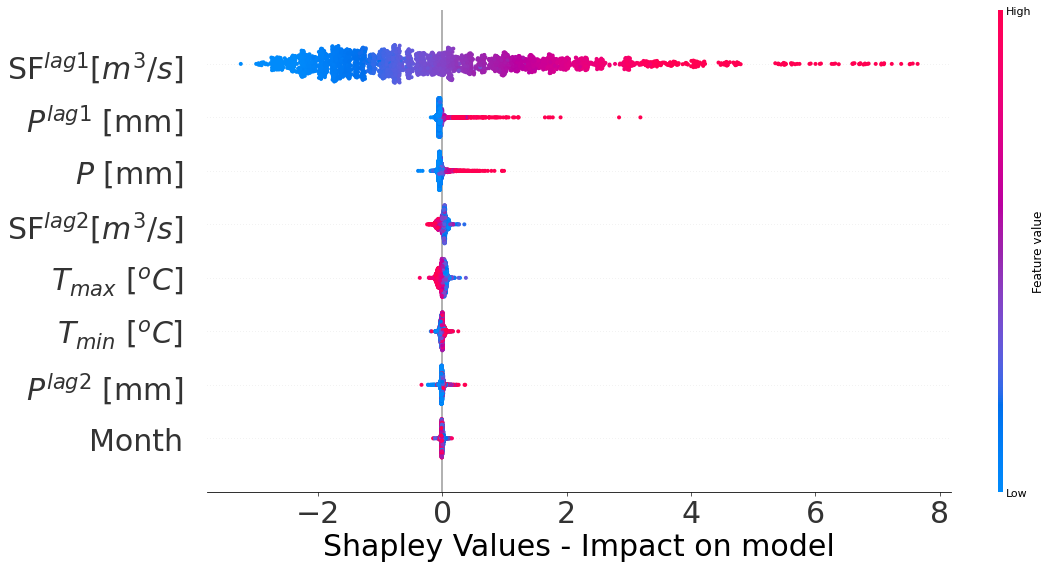

In [127]:
explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_AI[Features].to_numpy())

shap.summary_plot(shap_values, df_AI[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(save_features +str('/Feature_Importance_SF_XGBoost.pdf'), format='jpeg', dpi=300, bbox_inches ='tight')

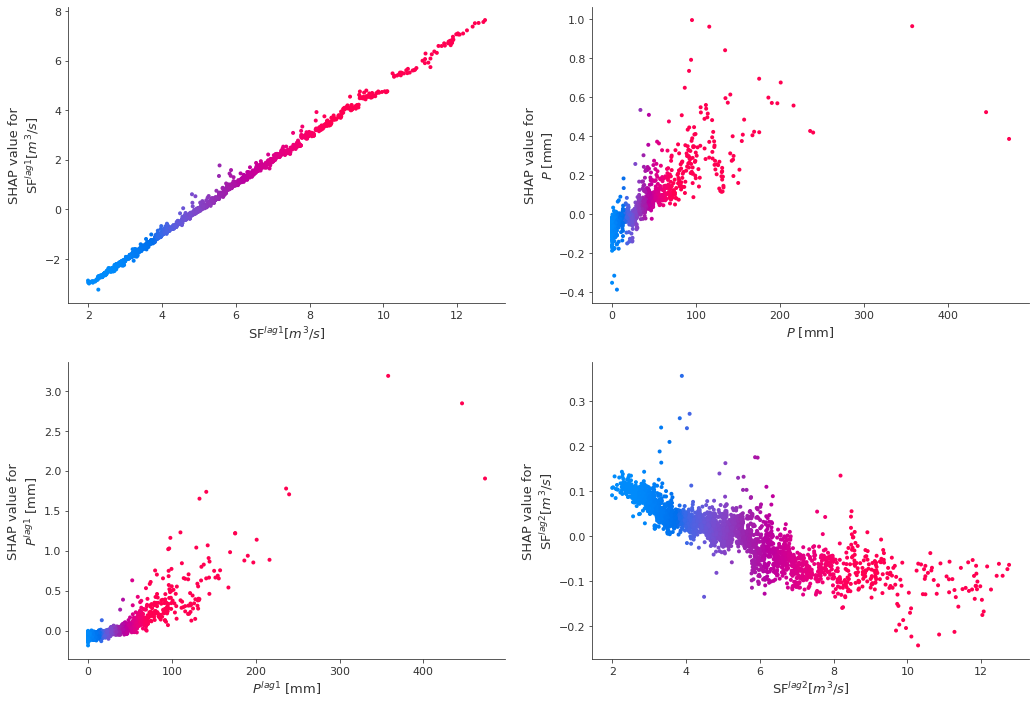

In [128]:
interaction_collage(df_AI,'SF$^{lag1} [m^3/s]$','$P^{lag1}$ [mm]','$P$ [mm]','SF$^{lag2} [m^3/s]$', save_features)

In [129]:
def save_all_features(Features,path_to_save):
    Pictures = {}
    for count,features in enumerate(Features, start=0):
        fig = plt.figure(figsize=(6,3.3),dpi=300)
        ax2 = fig.add_subplot(1,1,1)


        shap.dependence_plot(features,shap_values, df_AI[Features].to_numpy(),Features, ax=ax2, show=False,
                             interaction_index=features)
        Pictures[features] = fig
        plt.savefig(path_to_save +str('/Feature Interaction_'+str(count)+'- Hist.jpg'), format='jpeg', dpi=300, bbox_inches ='tight')
        
           
        
    return Pictures

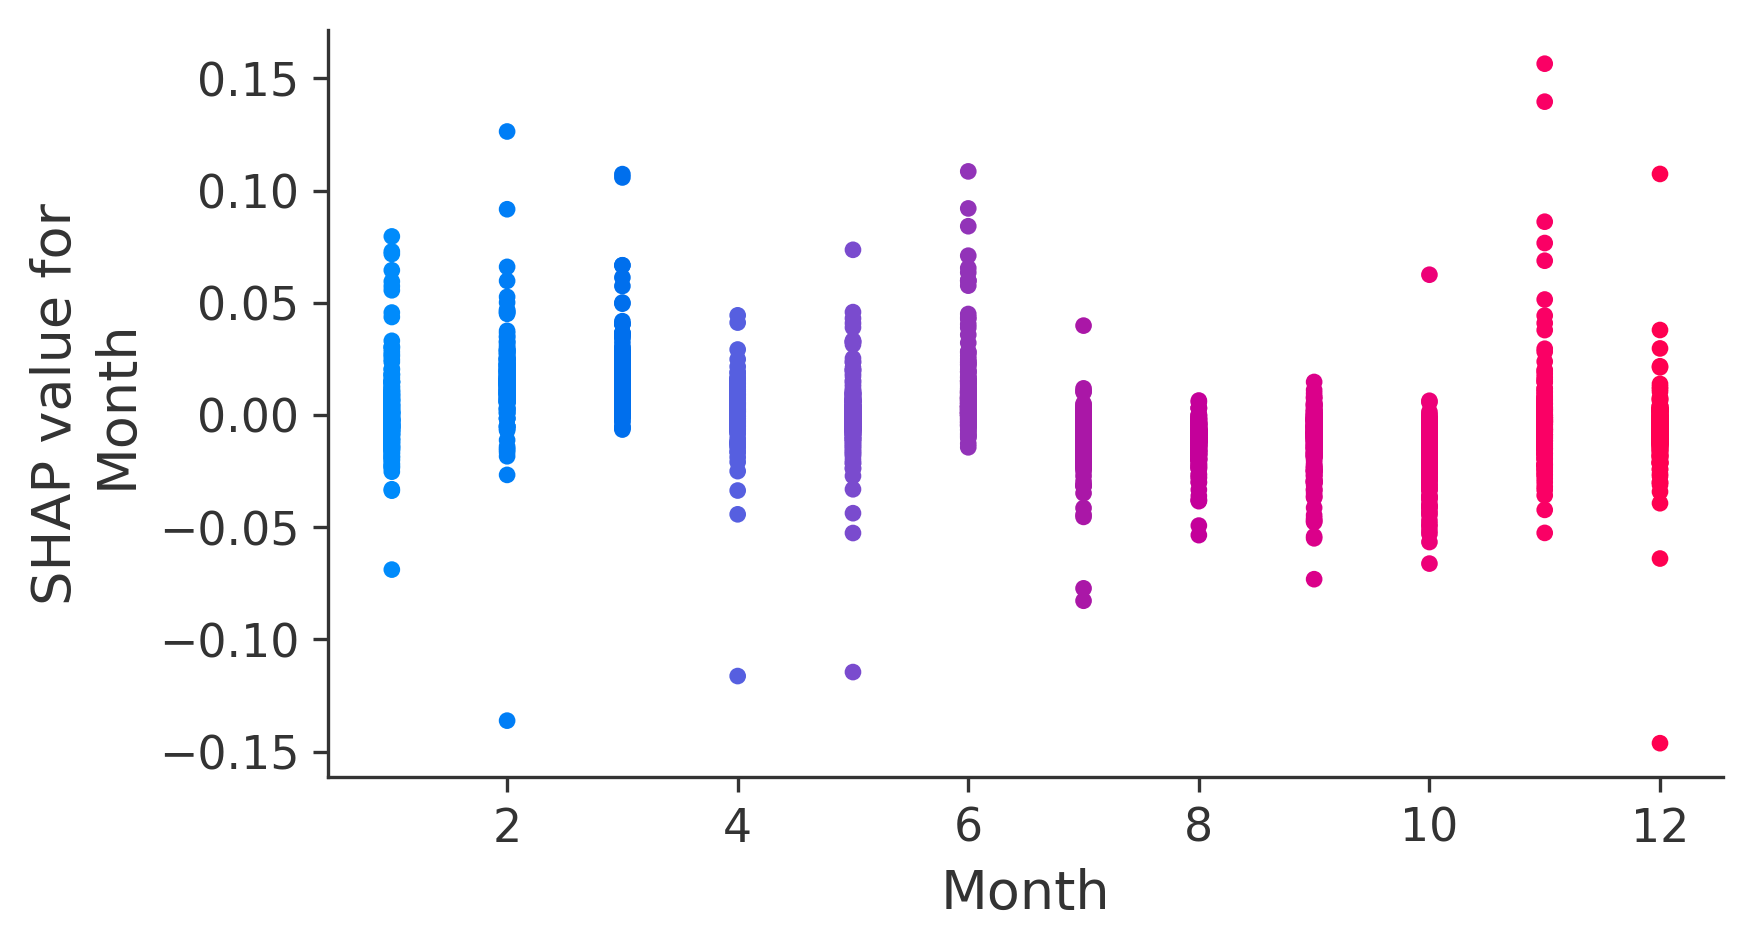

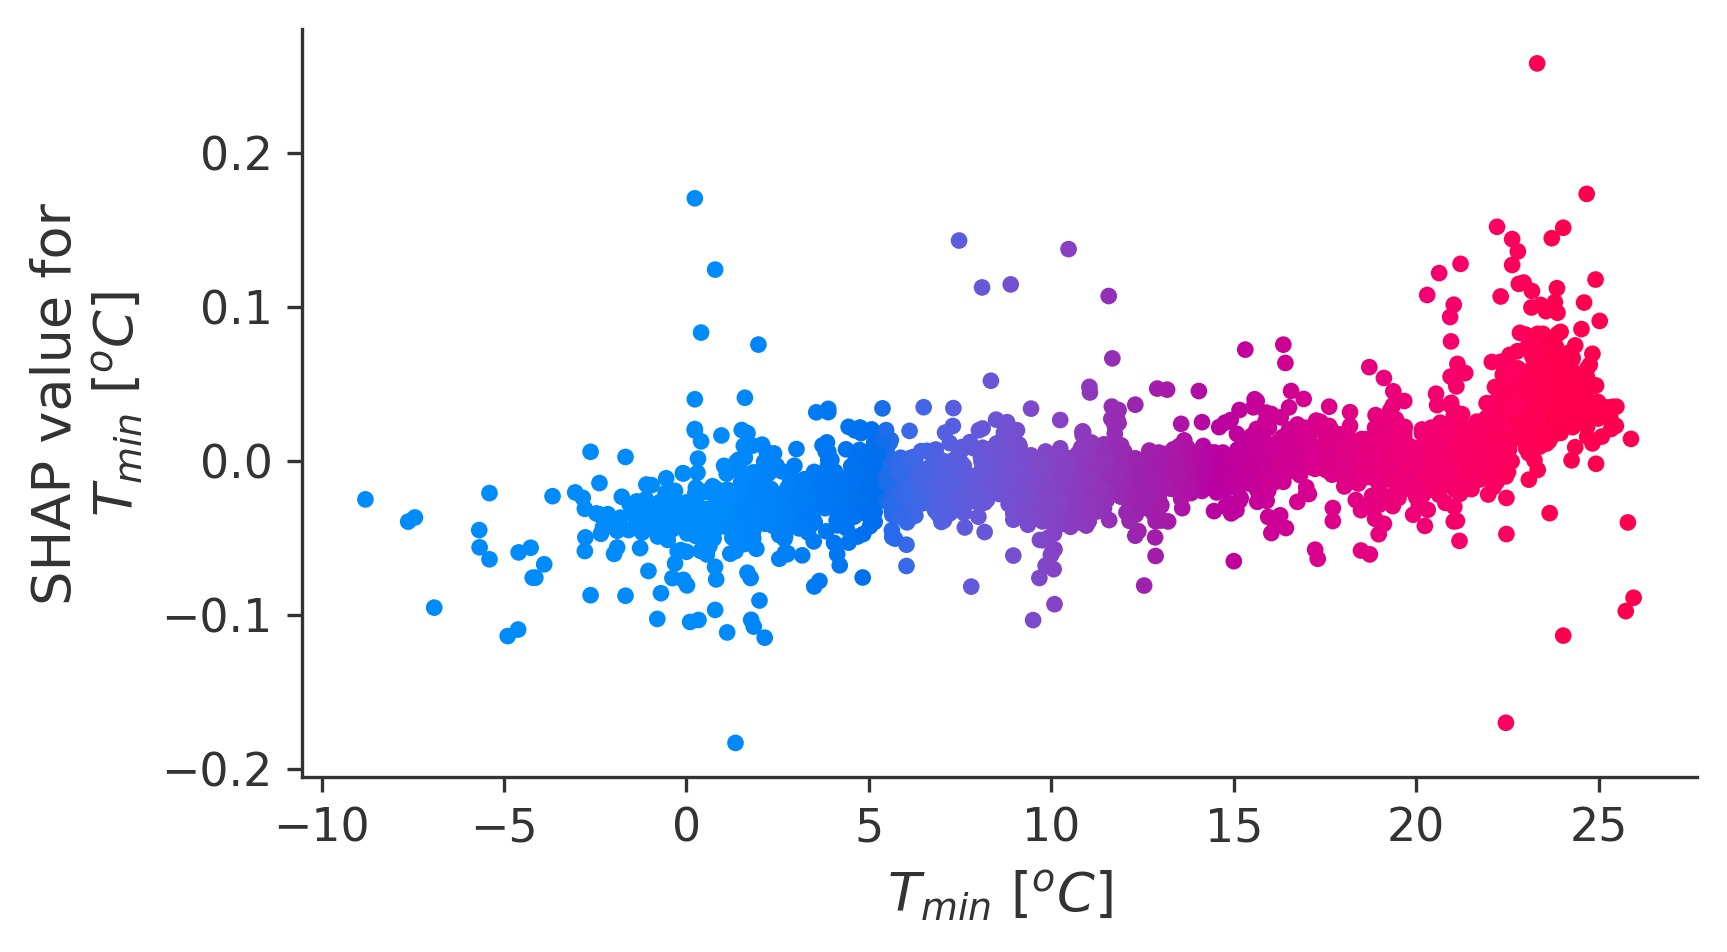

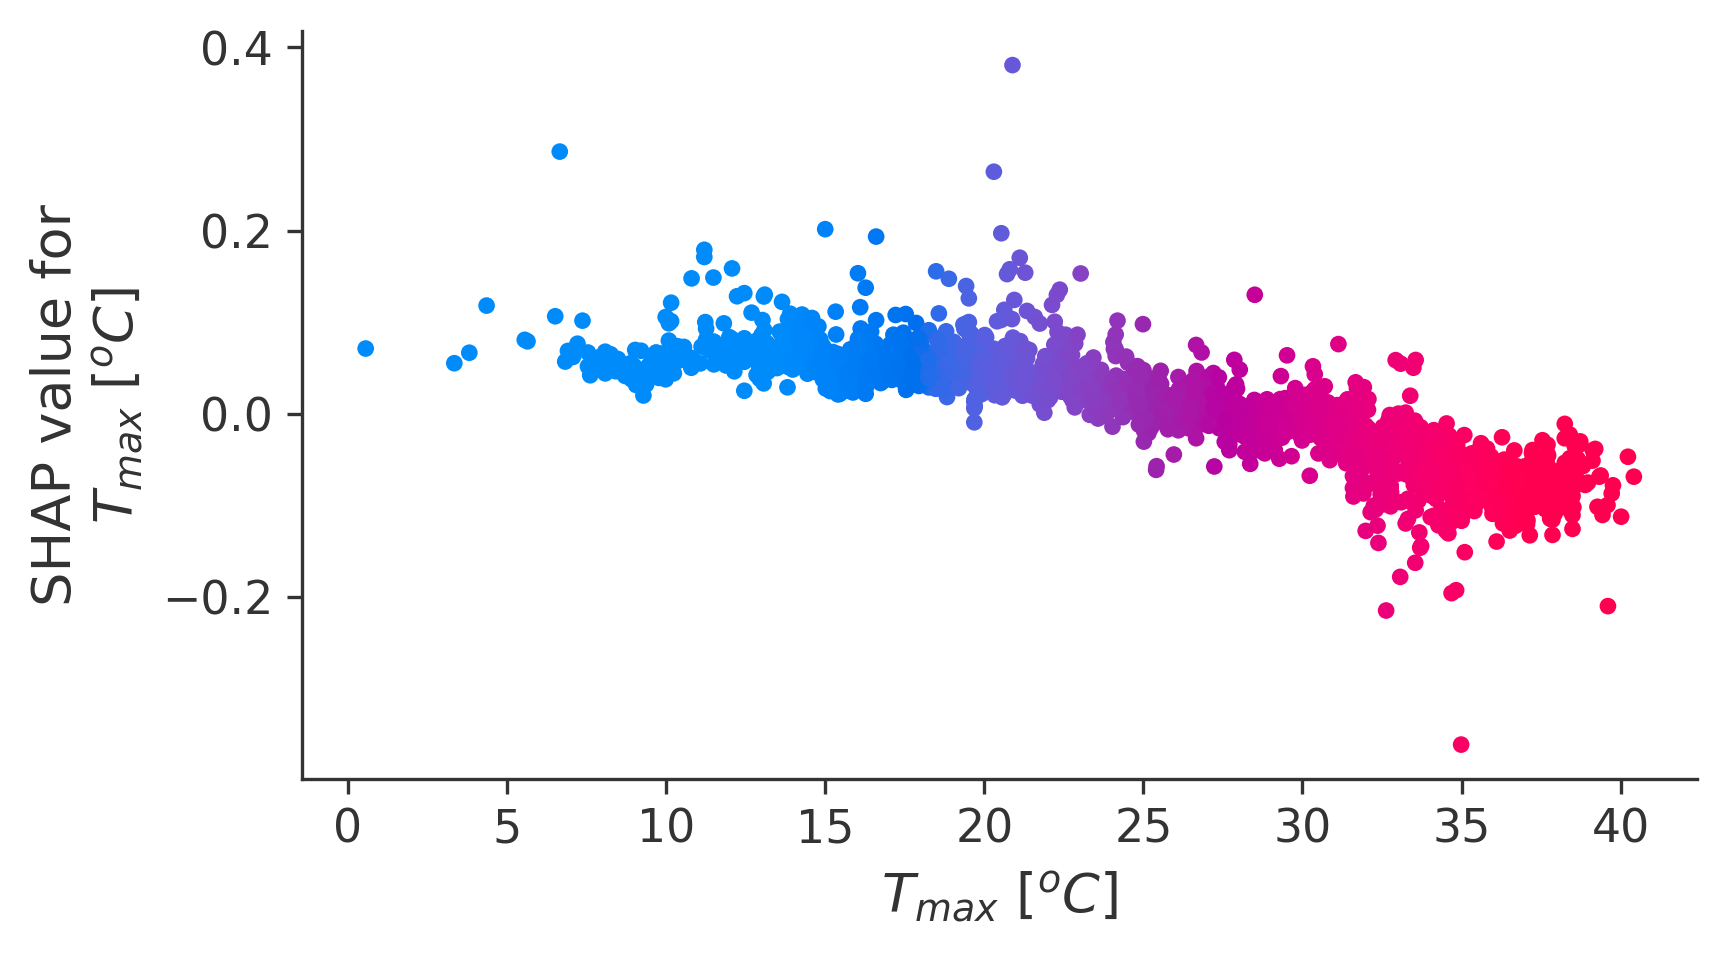

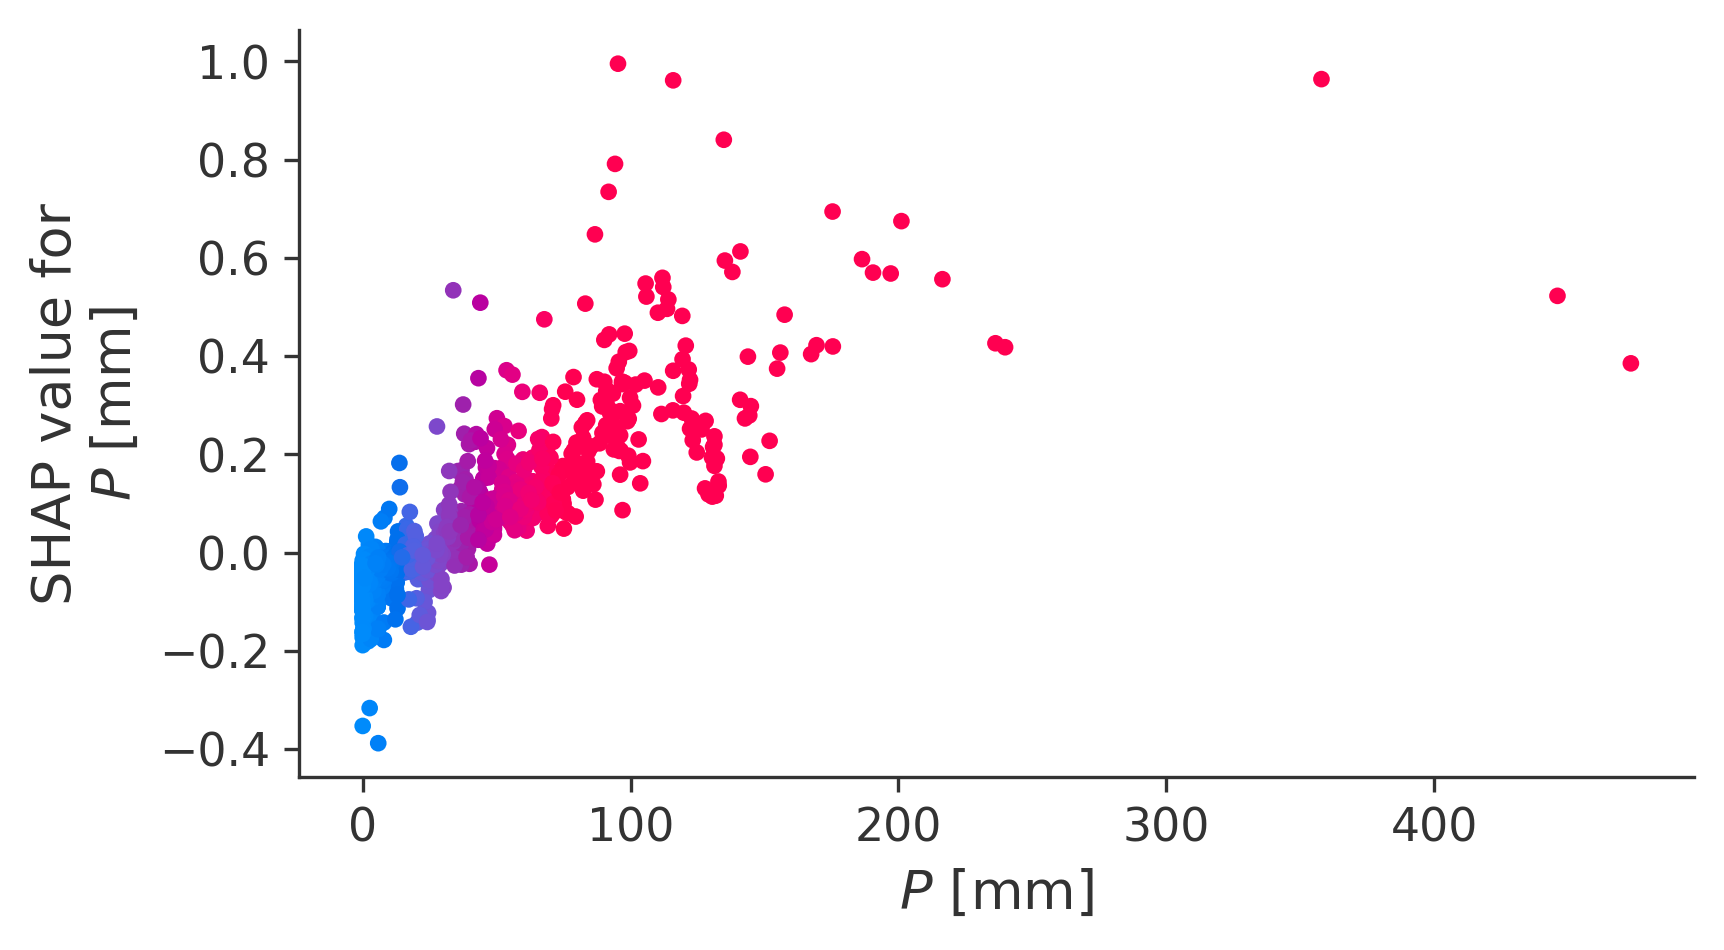

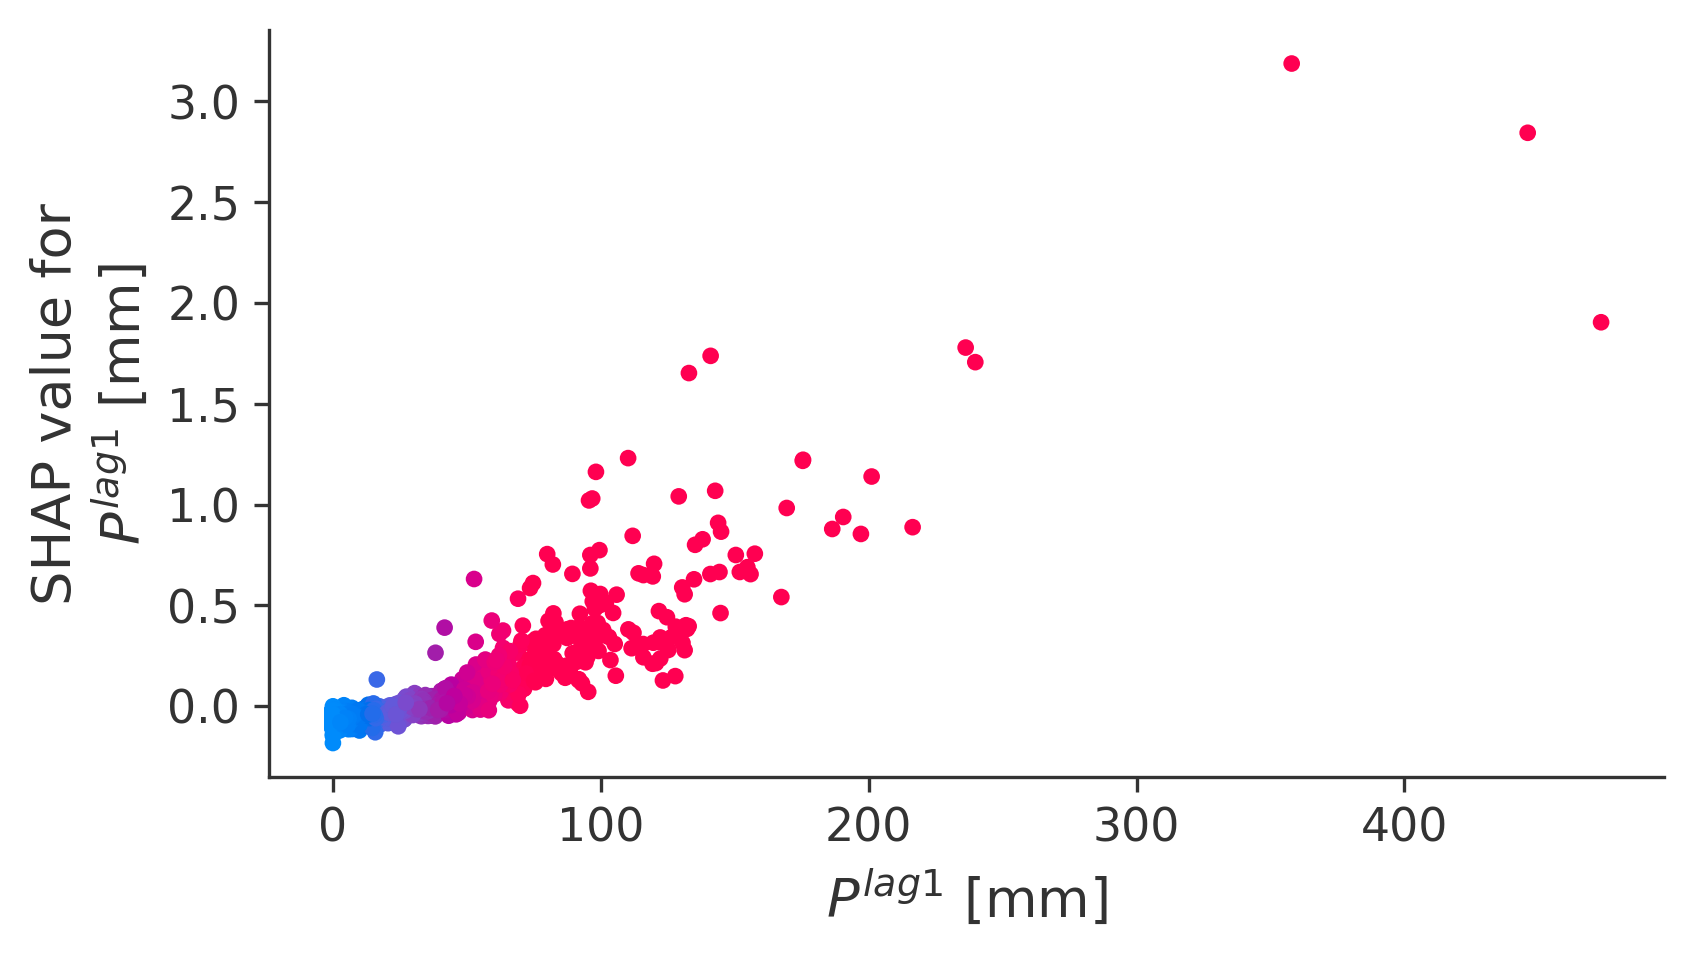

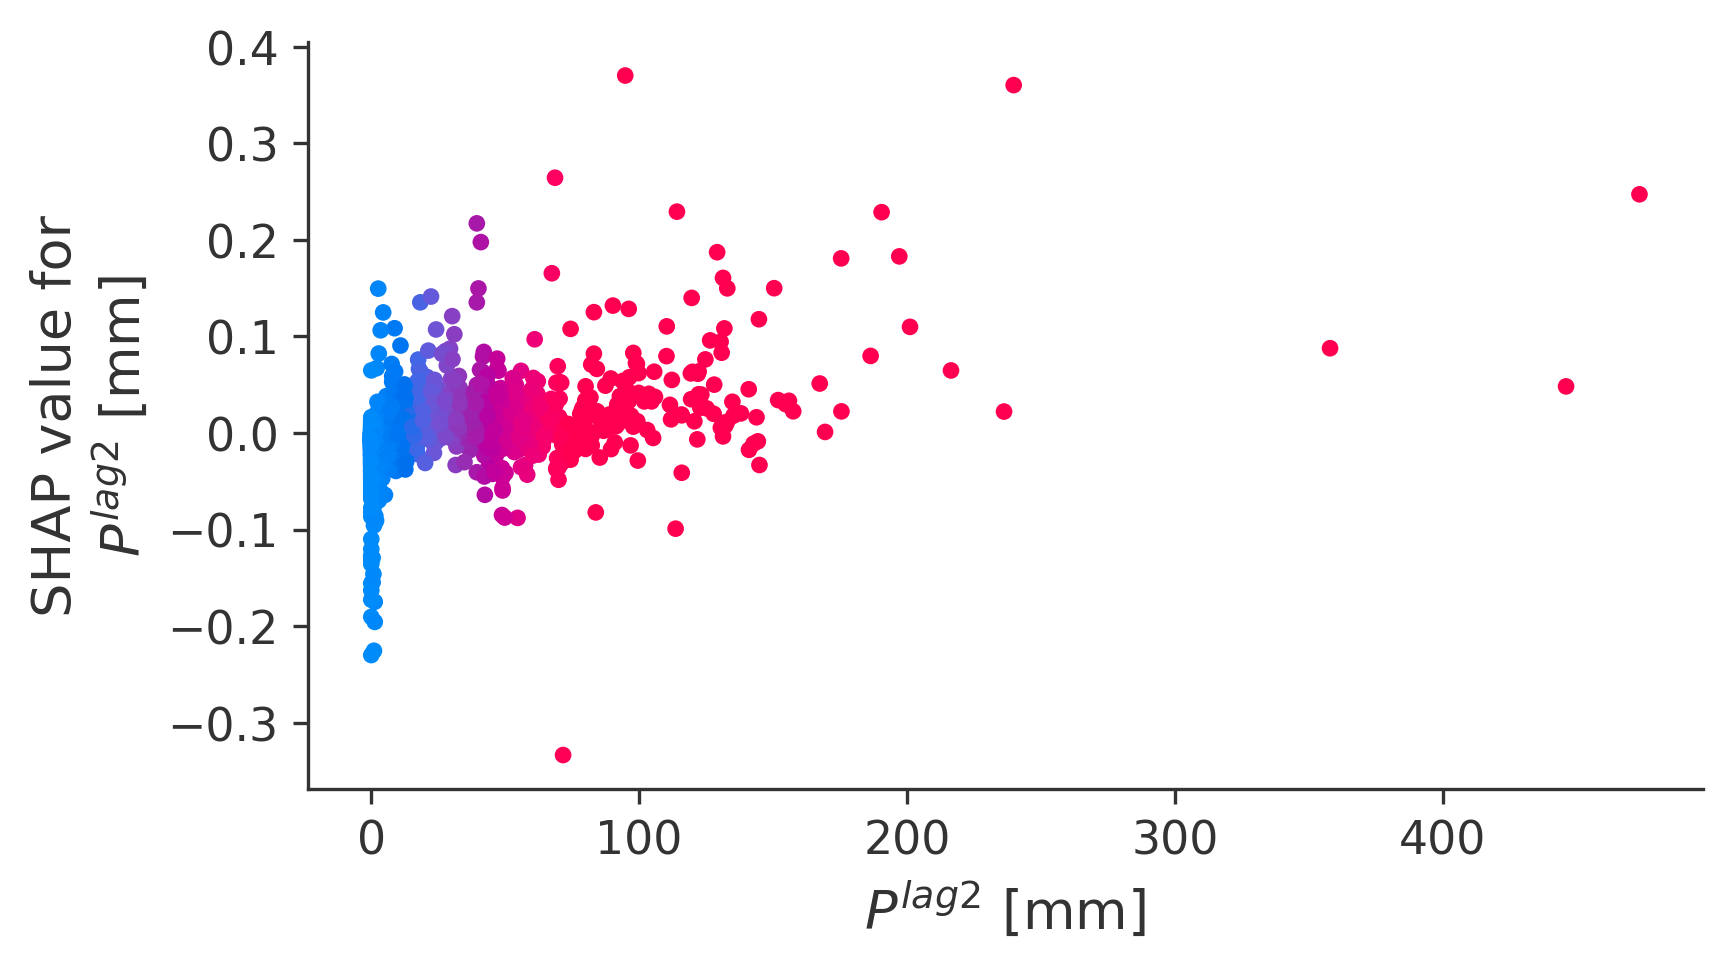

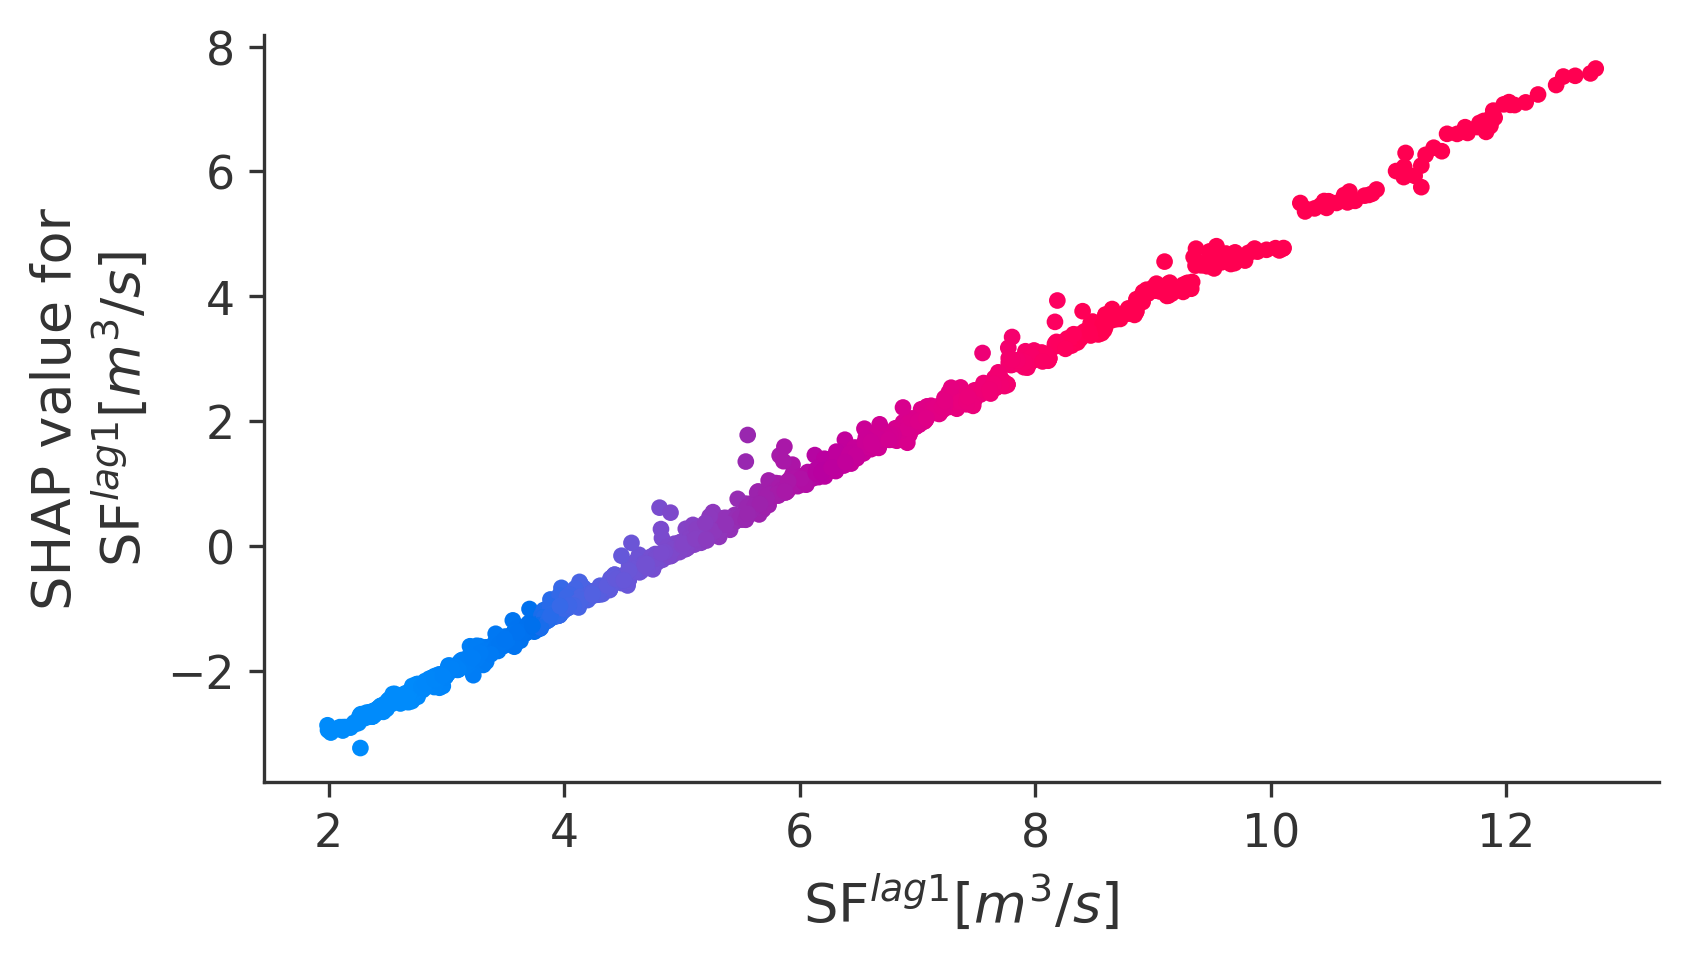

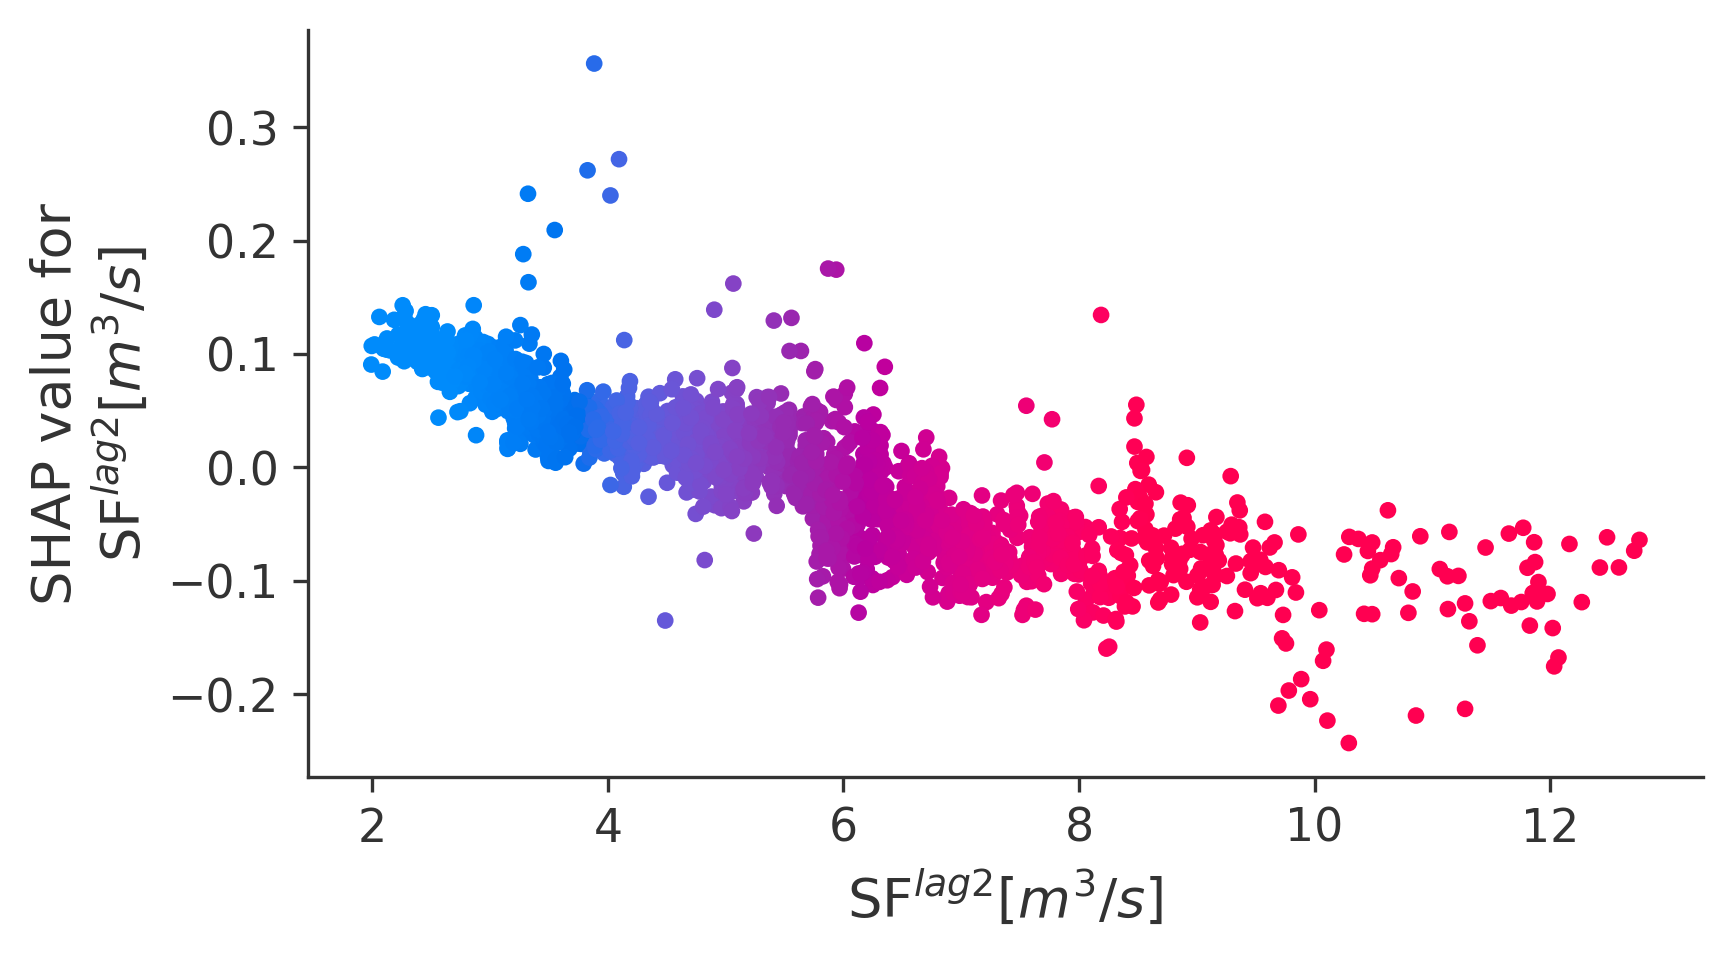

In [130]:
Features_Un = save_all_features(Features,save_features)

# Climate Change analysis 

## 4.5 RCP

############ Model Validation set Accuracy RCP 4.5###########
RMSE: 0.618 m/s^3
MAE: 0.574 m/s^3
MBE: -0.453 m/s^3
R-squared: 0.899
########################################
 


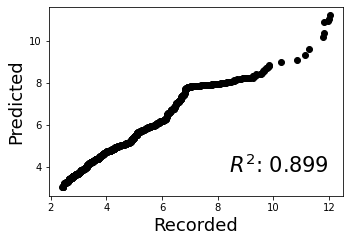

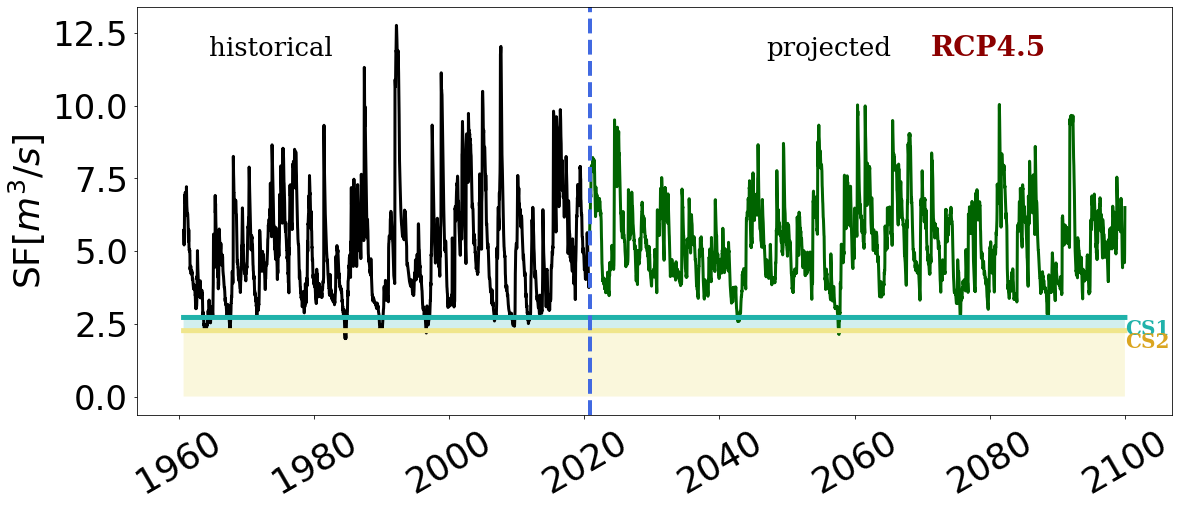

In [138]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)

df_future_45_xg= RCP(df_RCP45_MACA,df_AI,xgb_model_SF, 4.5, save_xgb_45)



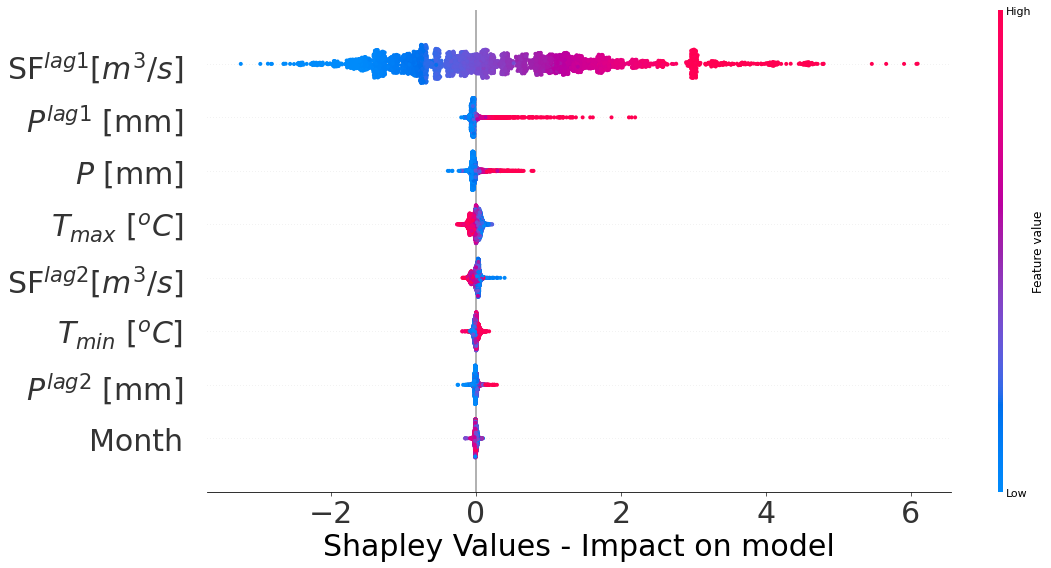

In [145]:

explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_future_45_xg[Features].to_numpy())

shap.summary_plot(shap_values, df_future_45_xg[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(save_xgb_45+str('/SF - RCP45.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

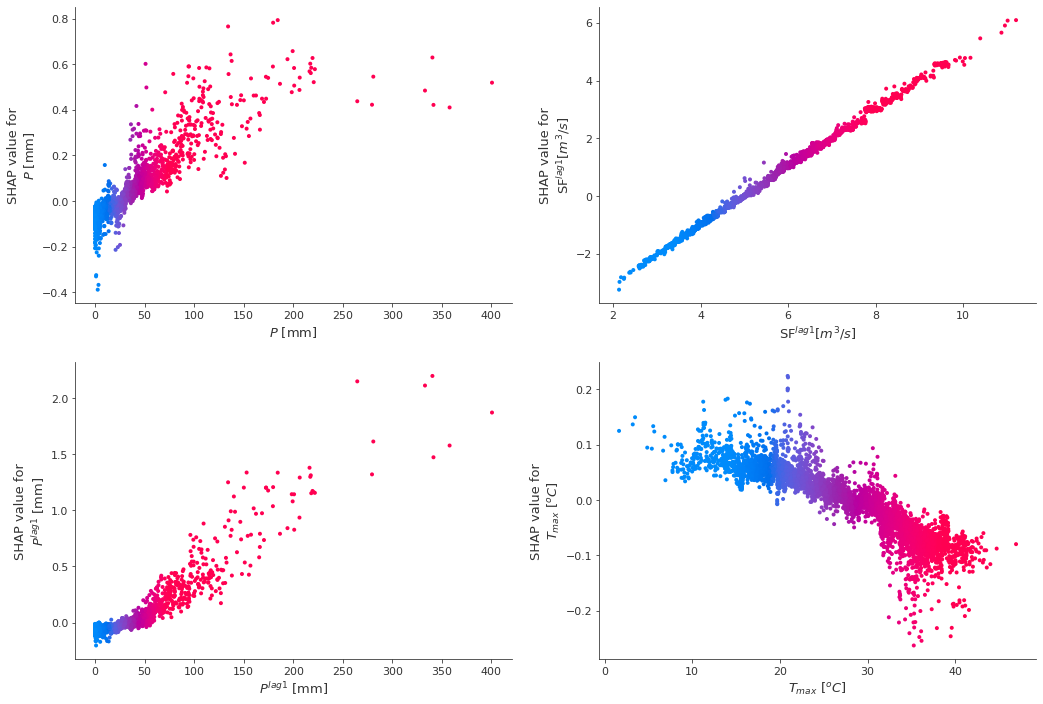

In [146]:

interaction_collage(df_future_45_xg,'$P$ [mm]','$P^{lag1}$ [mm]','SF$^{lag1} [m^3/s]$', '$T_{max}$ [$^oC$]',save_xgb_45)

In [150]:
df_future_45_xg.to_excel(save_xgb_45+str('/df_future_RCP45_XGBoost.xlsx'))

## RCP 8.5

############ Model Validation set Accuracy RCP 8.5###########
RMSE: 0.591 m/s^3
MAE: 0.511 m/s^3
MBE: -0.484 m/s^3
R-squared: 0.907
########################################
 


,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000
mean,6.524266,16.319701,28.523130,17.723635,4.628448
std,3.448260,7.638698,8.002986,28.831083,1.632191
min,1.000000,-5.535311,-2.486796,0.000000,1.930948
25%,4.000000,9.993536,22.550075,0.969577,3.385884
50%,7.000000,17.278101,29.094986,6.643954,4.319922
75%,10.000000,23.418151,34.902167,21.655931,5.540963
max,12.000000,29.437982,46.867452,341.637357,10.879001


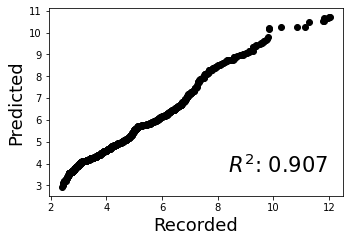

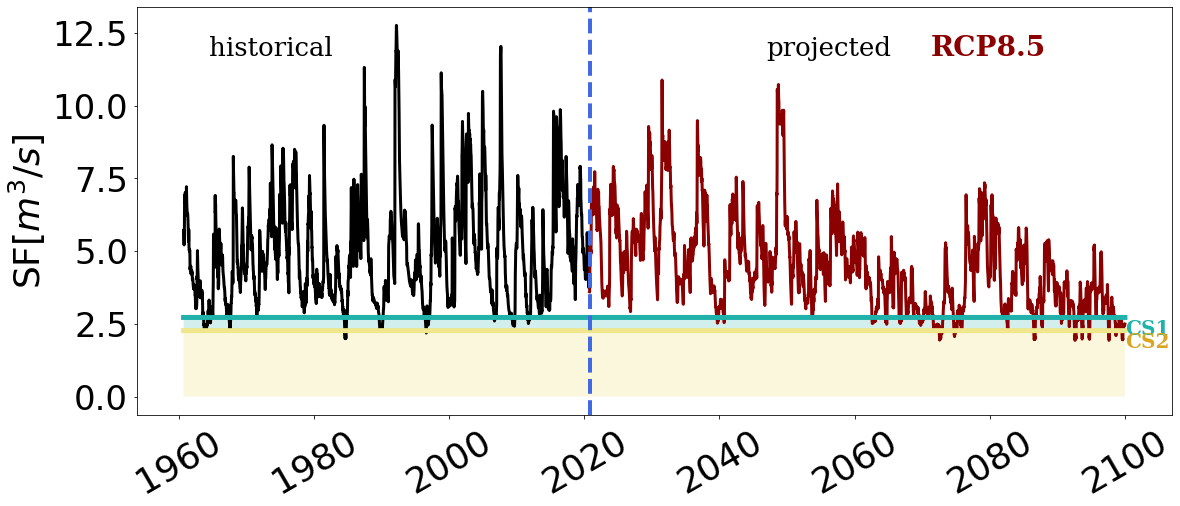

In [142]:
######## RCP(rcp_dataframe,df_AI, model, scenerio, save_to)

df_future= RCP(df_RCP85_MACA,df_AI,xgb_model_SF, 8.5, save_xgb_85)

df_future.describe()

In [143]:
df_future['2006-01-01':'2020-11-29'].describe()

,Month,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
count,778.000000,778.000000,778.000000,778.000000,778.000000
mean,6.507712,14.847683,26.990215,18.273627,5.516124
std,3.433961,7.390181,7.842183,29.485080,1.660517
min,1.000000,-3.404233,3.254484,0.000000,2.910778
25%,4.000000,8.813845,21.044282,1.252188,4.204762
50%,7.000000,15.664680,28.102424,7.694792,5.084394
75%,9.000000,22.033722,33.419415,22.026683,6.432471
max,12.000000,26.750003,42.703093,341.637357,10.727518


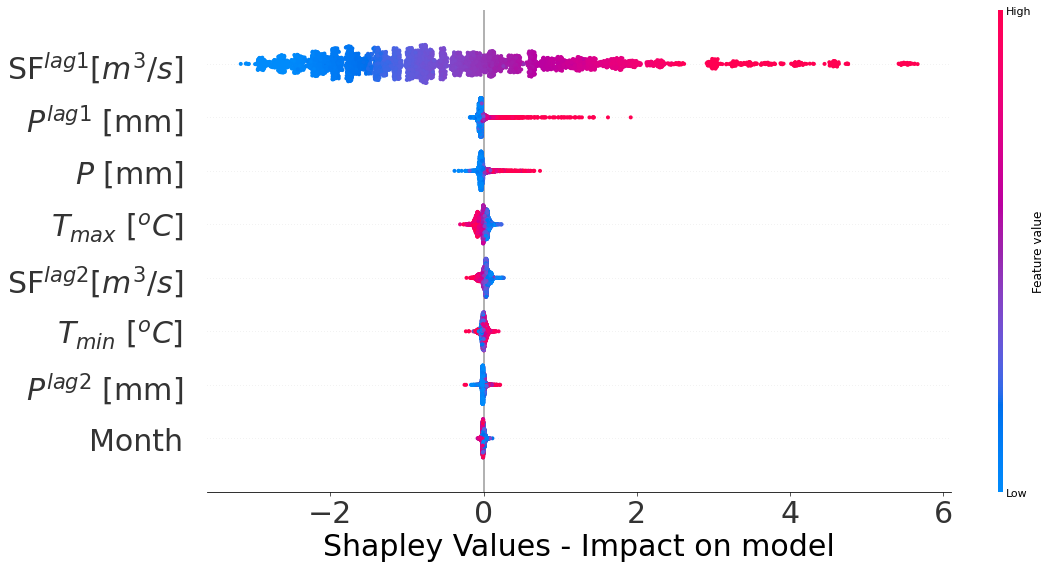

In [144]:

explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_future[Features].to_numpy())

shap.summary_plot(shap_values, df_future[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(save_xgb_85+str('/SF - RCP85.pdf'), format='pdf', dpi=300, bbox_inches ='tight')


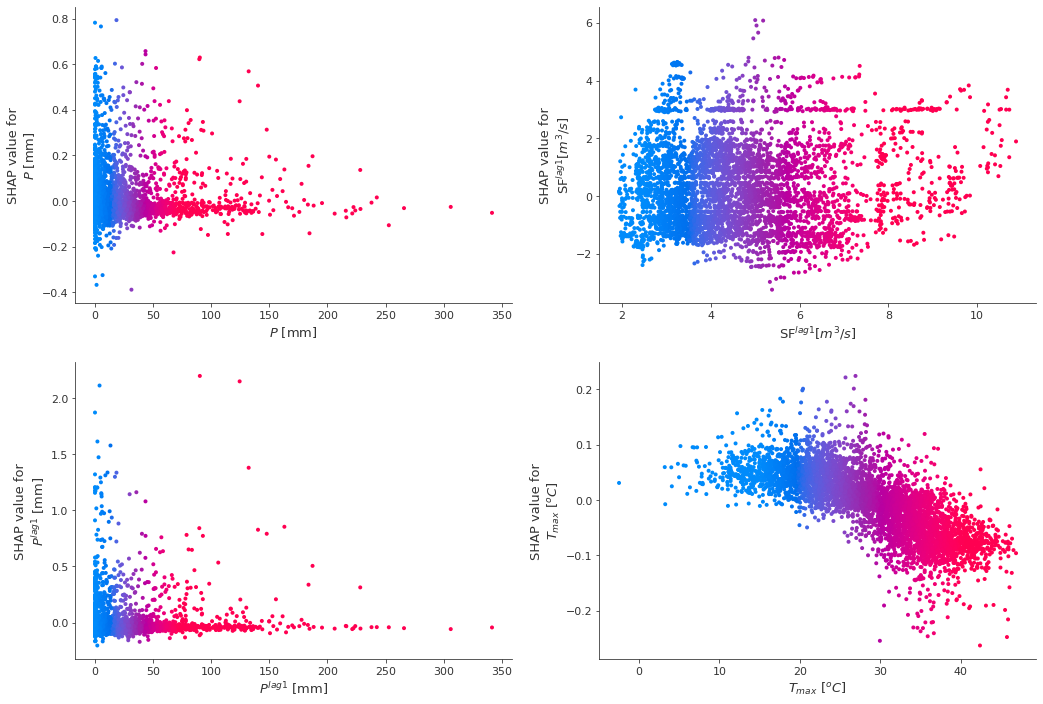

In [148]:
interaction_collage(df_future,'$P$ [mm]','$P^{lag1}$ [mm]','SF$^{lag1} [m^3/s]$', '$T_{max}$ [$^oC$]',save_xgb_85)

In [149]:
df_future.to_excel(save_xgb_85+str('/df_future_RCP85_XGBoost.xlsx'))

# Check the relationship with the evaportaion 

In [152]:
df_read = df_AI.copy()

In [179]:
TErraclimate = pd.read_csv('terraclimate.csv', skiprows=13, usecols= ['aet(mm)','soil(mm)'])

TErraclimate=TErraclimate.rename(columns = {"aet(mm)":"$ET$ [mm]", 'soil(mm)': '$SM$ [mm]'})

TErraclimate = TErraclimate[:-2]
TErraclimate  =TErraclimate.iloc[32:,:]
TErraclimate = TErraclimate.iloc[:-1,:]

TErraclimate

,$ET$ [mm],$SM$ [mm]
32,24.9,23.4
33,114.8,133.2
34,66.4,121.1
35,65.1,152.1
36,45.9,137.7
...,...,...
748,88.5,17.8
749,91.3,16.6
750,40.4,15.5
751,12.1,14.6


In [ ]:
SF

In [180]:
SF_Terraclimate = Sf_data.resample('M').mean()

SF_Terraclimate = (SF_Terraclimate[(SF_Terraclimate.index>= '1960-09-30')& (SF_Terraclimate.index<= '2020-09-30')])

SF_Terraclimate


,SF$[m^3/s]$
Date,
1960-09-30,5.721767
1960-10-31,5.400968
1960-11-30,6.761767
1960-12-31,6.845935
1961-01-31,6.729097
...,...
2020-05-31,4.698774
2020-06-30,5.414233
2020-07-31,4.772710


In [181]:

df_AI2 = pd.DataFrame()

df_AI2['$T_{min}$ [$^oC$]'] = df_read['$T_{min}$ [$^oC$]'].resample('M').mean()
df_AI2['$T_{max}$ [$^oC$]'] = df_read['$T_{max}$ [$^oC$]'].resample('M').mean()
df_AI2['$P$ [mm]'] = df_read['$P$ [mm]'].resample('M').sum()


df_AI2 = (df_AI2[(df_AI2.index >= '1958-01-01')& (df_AI2.index <= Approved_date)])

df_AI2

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm]
DATE,,,
1960-09-30,16.735714,32.971429,0.0
1960-10-31,16.074286,28.380000,315.3
1960-11-30,10.300000,21.432143,64.3
1960-12-31,2.892857,15.025000,59.3
1961-01-31,2.434286,14.077143,62.0
...,...,...,...
2020-05-31,16.982857,30.891429,235.8
2020-06-30,21.642857,32.946429,68.9
2020-07-31,24.396429,36.832143,22.3


In [182]:
df_AI2 = pd.concat([df_AI2,SF_Terraclimate],axis=1)

df_AI2

,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$
DATE,,,,
1960-09-30,16.735714,32.971429,0.0,5.721767
1960-10-31,16.074286,28.380000,315.3,5.400968
1960-11-30,10.300000,21.432143,64.3,6.761767
1960-12-31,2.892857,15.025000,59.3,6.845935
1961-01-31,2.434286,14.077143,62.0,6.729097
...,...,...,...,...
2020-05-31,16.982857,30.891429,235.8,4.698774
2020-06-30,21.642857,32.946429,68.9,5.414233
2020-07-31,24.396429,36.832143,22.3,4.772710


In [183]:
#df_AI['$R_w$ [mm]'] = df_AI['$R_w$ [mm]'].to_numpy()
df_AI2['$SM$ [mm]'] = TErraclimate['$SM$ [mm]'].to_numpy()
df_AI2['$ET$ [mm]'] = TErraclimate['$ET$ [mm]'].to_numpy()
df_AI2


,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,$SM$ [mm],$ET$ [mm]
DATE,,,,,,
1960-09-30,16.735714,32.971429,0.0,5.721767,23.4,24.9
1960-10-31,16.074286,28.380000,315.3,5.400968,133.2,114.8
1960-11-30,10.300000,21.432143,64.3,6.761767,121.1,66.4
1960-12-31,2.892857,15.025000,59.3,6.845935,152.1,65.1
1961-01-31,2.434286,14.077143,62.0,6.729097,137.7,45.9
...,...,...,...,...,...,...
2020-05-31,16.982857,30.891429,235.8,4.698774,17.8,88.5
2020-06-30,21.642857,32.946429,68.9,5.414233,16.6,91.3
2020-07-31,24.396429,36.832143,22.3,4.772710,15.5,40.4


In [184]:
df_AI2.describe()



,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,$SM$ [mm],$ET$ [mm]
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,13.559448,26.459370,75.764369,4.999558,62.917614,68.330097
std,7.198072,6.974292,71.998595,1.848586,51.389786,38.042566
min,-1.436429,10.310714,0.000000,2.043367,8.100000,1.200000
25%,6.875000,20.432143,25.368022,3.558400,23.700000,40.800000
50%,13.845714,27.153571,57.300000,4.660387,45.400000,62.100000
75%,20.564286,32.650000,101.500000,6.050367,89.500000,91.900000
max,25.360714,39.421429,642.000000,12.611161,251.300000,182.800000


In [186]:
# Pumping patterns is hypothesized to be associated with the month
df_AI2['Month'] = df_AI2.index.month 

# There could be some lag effects in the hydroclimatic behavior for Karst aquifers
df_AI2['$T_{max}^{lag1}$ [$^oC$]'] = df_AI2['$T_{max}$ [$^oC$]'].shift(1)
df_AI2['$T_{max}^{lag2}$ [$^oC$]'] = df_AI2['$T_{max}$ [$^oC$]'].shift(2)

df_AI2['$T_{min}^{lag1}$ [$^oC$]'] = df_AI2['$T_{min}$ [$^oC$]'].shift(1)
df_AI2['$T_{min}^{lag2}$ [$^oC$]'] = df_AI2['$T_{min}$ [$^oC$]'].shift(2)

df_AI2['$P^{lag1}$ [mm]'] = df_AI2['$P$ [mm]'].shift(1)
df_AI2['$P^{lag2}$ [mm]'] = df_AI2['$P$ [mm]'].shift(2)

df_AI2['SF$^{lag1} [m^3/s]$'] = df_AI2['SF$[m^3/s]$'].shift(1)
df_AI2['SF$^{lag2} [m^3/s]$'] = df_AI2['SF$[m^3/s]$'].shift(2)



df_AI2.dropna(inplace=True)


In [187]:

Features = ['Month','$T_{min}$ [$^oC$]','$T_{max}$ [$^oC$]','$P$ [mm]',
            '$P^{lag1}$ [mm]','$P^{lag2}$ [mm]','$SM$ [mm]','$ET$ [mm]',
            'SF$^{lag1} [m^3/s]$','SF$^{lag2} [m^3/s]$']

#SpringFlow for Comal = Target
Target = ['SF$[m^3/s]$']


#Take the tain set till 2005 and test set from 2006 till 2020

df_AI2_Train = df_AI2[:'2005-12-31']
df_AI2_Test = df_AI2['2006-01-01':]

#Create Independent and dependent variable for machine learning
X = df_AI2[Features].to_numpy()
Y = df_AI2[Target].to_numpy()
test_X = df_AI2_Test[Features].iloc[0].to_numpy().reshape(1, -1)

In [188]:
train_X = df_AI2_Train[Features].to_numpy()
train_y = df_AI2_Train[Target].to_numpy()

xgb_model_SF  = XGBRegressor()
xgb_model_SF .fit(train_X, train_y)
Y_Train_Pred = xgb_model_SF .predict(train_X)



In [189]:
rmse = np.sqrt(mean_squared_error(train_y,Y_Train_Pred))
RSQ = r2_score(train_y,Y_Train_Pred)
MAE = np.mean(np.abs(train_y - Y_Train_Pred))
MBE = np.mean(train_y - Y_Train_Pred)
print("############ Model Accuracy Xgboost -Train ############")
print("RMSE: %0.3f" % rmse,'m')
print("MAE: %0.3f" % MAE,'m')
print("MBE: %0.3f" % MBE,'m')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")

#################################################################################################
# Make predictions on Testing data and Test model accuracy
#################################################################################################
df_AI2_Test['SF$^{pred} [m^3/s]$'] = 0
Test_X = df_AI2_Test[Features].iloc[0].to_numpy().reshape(1, -1)
df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[0] = xgb_model_SF .predict(Test_X)[0]

i = 0
for row in df_AI2_Test.itertuples():
    df_AI2_Test['SF$^{lag1} [m^3/s]$'][i+1] = df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[i]
    
    df_AI2_Test['SF$^{lag2} [m^3/s]$'][i+1] = df_AI2_Test['SF$^{lag1} [m^3/s]$'].iloc[i]
    
    Test_X = df_AI2_Test[Features].iloc[i+1].to_numpy().reshape(1, -1)
    df_AI2_Test['SF$^{pred} [m^3/s]$'].iloc[i+1] = xgb_model_SF .predict(Test_X)[0]
    i = i+1
    if i == (len(df_AI2_Test)-1):
        break

rmse = np.sqrt(mean_squared_error(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
                                  df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
RSQ = r2_score(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy(),
               df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
MAE = np.mean(np.abs(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
                     df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy()))
MBE = np.mean(df_AI2_Test['SF$[m^3/s]$'].sort_values(ascending=True).to_numpy() - 
              df_AI2_Test['SF$^{pred} [m^3/s]$'].sort_values(ascending=True).to_numpy())
print("############ Model Accuracy XGBoost -Test ############")
print("RMSE: %0.3f" % rmse,'m')
print("MAE: %0.3f" % MAE,'m')
print("MBE: %0.3f" % MBE,'m')
print("R-squared: %0.3f" % RSQ)
print("########################################")
print(" ")


############ Model Accuracy Xgboost -Train ############
RMSE: 0.004 m
MAE: 1.982 m
MBE: 0.000 m
R-squared: 1.000
########################################
 
############ Model Accuracy XGBoost -Test ############
RMSE: 0.476 m
MAE: 0.364 m
MBE: 0.188 m
R-squared: 0.939
########################################
 


In [190]:
xgb_model_SF = xgb_model_SF 

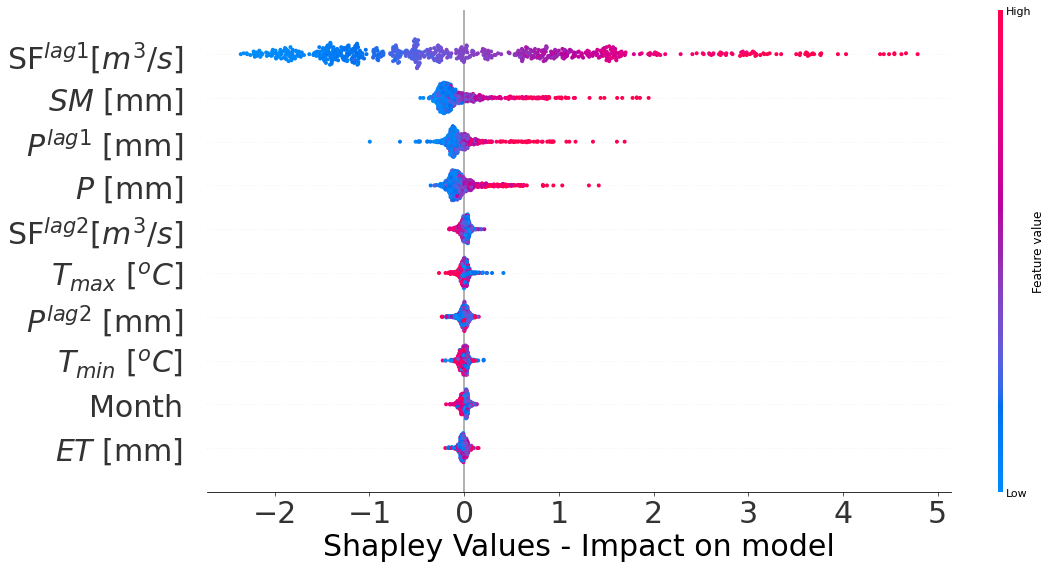

In [191]:
explainer = shap.TreeExplainer(xgb_model_SF)
shap_values = explainer.shap_values(df_AI2[Features].to_numpy())

shap.summary_plot(shap_values, df_AI2[Features].to_numpy(), Features, plot_size=(16,8), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)
plt.savefig(save_XGBoost +str('/Feature Importance ET-SM- SF -_XGBoost.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

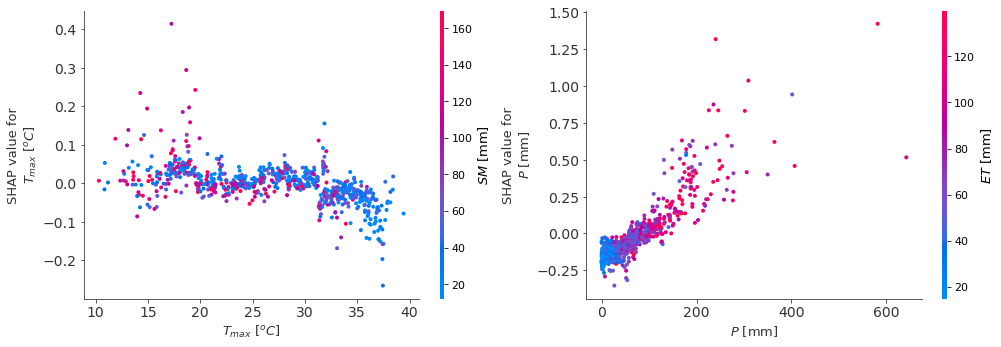

In [192]:
fig = plt.figure(figsize=(16,5),)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
   
shap.dependence_plot('$T_{max}$ [$^oC$]', shap_values, df_AI2[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index='$SM$ [mm]')
plt.tick_params(labelsize=14)

ax2 = fig.add_subplot(gs[0,1])
shap.dependence_plot('$P$ [mm]',shap_values, df_AI2[Features].to_numpy(),Features, ax=ax2, show=False,
                     interaction_index='$ET$ [mm]')
plt.tick_params(labelsize=14)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.9)

#plt.subplot_tool()

plt.savefig(save_XGBoost +str('/Feature Importance ET-P__T-SM--_XGBoost.pdf'), format='pdf', dpi=300, bbox_inches ='tight')

In [ ]:
df_li